In [1]:
library(DESeq2)
library(tidyverse)
library(ggplot2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: M

In [2]:
counts = read_csv('../03_build_meta_and_counts/counts.csv') %>% column_to_rownames('gene')
counts %>% head

Rows: 57010 Columns: 186
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): gene
dbl (185): S0010_01_chow_HY, S0010_02_chow_HY, S0010_03_chow_HY, S0010_04_ch...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,S0010_01_chow_HY,S0010_02_chow_HY,S0010_03_chow_HY,S0010_04_chow_HY,S0010_05_chow_HY,S0010_06_chow_HY,S0010_01_chow_HPF,S0010_02_chow_HPF,S0010_03_chow_HPF,S0010_04_chow_HPF,⋯,S0038_1424_fast_HPF,S0038_1444_fast_HPF,S0038_1424_fast_SC,S0038_1433_fast_SC,S0038_1434_fast_SC,S0038_1435_fast_SC,S0038_1444_fast_IC,S0038_1453_fast_IC,S0038_1434_fast_ZI,S0038_1454_fast_ZI
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000104478,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000104385,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000086053,41,49,37,19,23,22,22,53,34,2,⋯,0,2,0,1,13,4,0,2,0,0
ENSMUSG00000101231,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000102135,1,5,0,0,0,0,0,0,0,0,⋯,6,3,0,1,2,2,4,11,5,4
ENSMUSG00000103282,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [3]:
meta = read_csv('../03_build_meta_and_counts/meta_long.csv') %>% filter(!is.na(name)) %>% column_to_rownames("name") %>% mutate(name = rownames(.))
meta %>% print

Rows: 186 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (8): filename, name, seq_run, seq_sample, diet, region, hemisphere, notes
dbl  (15): rna_conc_qbit, box_id, animal_id, diet_kcal, experiment_duration,...
dttm  (2): experiment_start, time_of_euthanasia

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


                                        filename seq_run seq_sample
S0010_01_chow_HY             1_Chow_Hyp_both_S80    0010        S80
S0010_02_chow_HY             2_Chow_Hyp_both_S44    0010        S44
S0010_03_chow_HY             3_Chow_Hyp_both_S78    0010        S78
S0010_04_chow_HY             4_Chow_Hyp_both_S25    0010        S25
S0010_05_chow_HY             5_Chow_Hyp_both_S84    0010        S84
S0010_06_chow_HY             6_Chow_Hyp_both_S66    0010        S66
S0010_01_chow_HPF            1_Chow_Hip_left_S17    0010        S17
S0010_02_chow_HPF            2_Chow_Hip_left_S71    0010        S71
S0010_03_chow_HPF             3_Chow_Hip_left_S4    0010         S4
S0010_04_chow_HPF           4_Chow_Hip_right_S68    0010        S68
S0010_05_chow_HPF           5_Chow_Hip_right_S54    0010        S54
S0010_06_chow_HPF           6_Chow_Hip_right_S86    0010        S86
S0010_01_chow_SC              1_Chow_SC_left_S21    0010        S21
S0010_02_chow_SC              2_Chow_SC_left_S43

In [4]:
meta %>%
filter(seq_run == '0010') %>%
filter(seq_sample =='S1')

,filename,seq_run,seq_sample,rna_conc_qbit,box_id,animal_id,diet,diet_kcal,region,hemisphere,⋯,bw_f,bw_change,bw_change_pct,bw_change_pct_ph,fw_i,fw_f,kcal_intake,power_intake,notes,name
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
S0010_01_chow_PFC,1_Chow_PFC_left_S1,0010,S1,61.2,34,1,chow,3227,PFC,left,⋯,24.6,1.2,0.05128205,0.003205128,741.7,734.4,11778.55,736.1594,NA,S0010_01_chow_PFC


In [5]:
samples_failing_star_qc = qs::qread('../02_qc/samples_failing_qc.qs')

outliers_list = list()
outliers_list[['names_failing_star_qc']] = meta %>% filter(filename %in% samples_failing_star_qc) %>% distinct(filename, name) %>% pull(name)
outliers_list

$names_failing_star_qc
 [1] "S0010_04_chow_HPF"   "S0010_12_fast_HY"    "S0010_11_fast_HPF"  
 [4] "S0010_10_fast_SC"    "S0037_1441_chow_HY"  "S0038_1422_chow_HY" 
 [7] "S0038_1451_chow_HY"  "S0038_1431_chow_HPF" "S0038_1441_chow_HPF"
[10] "S0038_1452_chow_HPF" "S0038_1422_chow_SC"  "S0038_1442_chow_IC" 
[13] "S0038_1452_chow_IC"  "S0038_1432_chow_ZI"  "S0038_1442_chow_ZI" 
[16] "S0038_1423_chow_ZI"  "S0038_1435_fast_HY"  "S0038_1445_fast_HY" 
[19] "S0038_1455_fast_HY"  "S0038_1424_fast_HPF" "S0038_1444_fast_HPF"
[22] "S0038_1424_fast_SC"  "S0038_1433_fast_SC"  "S0038_1434_fast_SC" 
[25] "S0038_1435_fast_SC"  "S0038_1444_fast_IC"  "S0038_1453_fast_IC" 
[28] "S0038_1434_fast_ZI"  "S0038_1454_fast_ZI"

In [6]:
do_preprocessing = function(counts, meta, keep_names){
    meta_f = meta %>%
        filter(name %in% keep_names)
    counts_f = counts %>%
        select(all_of(keep_names))
    dds <- DESeqDataSetFromMatrix(countData = counts_f,
                          colData = meta_f,
                          design= ~ diet)
    keep <- rowSums(counts(dds)) >= 10
    dds <- dds[keep,]
    dds <- DESeq(dds)
    vsd <- vst(dds, blind=FALSE)
    preprocessed = list(meta_f = meta_f, counts_f = counts_f, dds = dds, vsd=vsd)
    preprocessed
}

In [7]:
do_pca = function(preprocessed){
    # Run PCA
    vst_counts <- assay(preprocessed$vsd)
    pca_result <- prcomp(t(vst_counts), center = TRUE, scale = FALSE)
    preprocessed$pca = pca_result
    preprocessed
}

In [8]:
do_pca_detect_outliers = function(preprocessed, pcz_cutoff=2){
    pca_result = preprocessed$pca
    meta_f = preprocessed$meta_f
    # Create a data frame from the PCA results
    df = tibble(name = rownames(pca_result$x),
              PC1 = pca_result$x[,1],
              PC2 = pca_result$x[,2],
              PC3 = pca_result$x[,3]) %>%
    full_join(meta_f, by='name') %>%
    group_by(region) %>%
    mutate(PC1_zregion = scale(PC1),
           PC2_zregion = scale(PC2),
           PC3_zregion = scale(PC3)) %>%
    ungroup %>%
    mutate(PC1_zregion_f = case_when(abs(PC1_zregion) >= pcz_cutoff ~ TRUE,
                                     TRUE ~ FALSE)) %>%
    mutate(PC2_zregion_f = case_when(abs(PC2_zregion) >= pcz_cutoff ~ TRUE,
                                     TRUE ~ FALSE)) %>%
    mutate(PC3_zregion_f = case_when(abs(PC3_zregion) >= pcz_cutoff ~ TRUE,
                                     TRUE ~ FALSE)) %>%
#     mutate(PCA_zregion_outlier = case_when(PC1_zregion_f | PC2_zregion_f | PC3_zregion_f ~ TRUE,
    mutate(PCA_zregion_outlier = case_when(PC1_zregion_f | PC2_zregion_f ~ TRUE,
                                           TRUE ~ FALSE))
    preprocessed$meta_f = df
    preprocessed
}


In [9]:
preprocessed_list = list()

In [10]:
keep_names = meta %>%
    filter(!is.na(filename)) %>%
    filter(!(name %in% outliers_list$names_failing_star_qc)) %>%
    distinct(name) %>%
    pull(name)

preprocessed = do_preprocessing(counts, meta, keep_names) %>% do_pca %>% do_pca_detect_outliers
preprocessed_list[['names_failing_all_region_pca_qc']] = preprocessed
outliers_list[['names_failing_all_region_pca_qc']] = preprocessed$meta_f %>% filter(PCA_zregion_outlier) %>% distinct(name) %>% pull(name)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 237 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



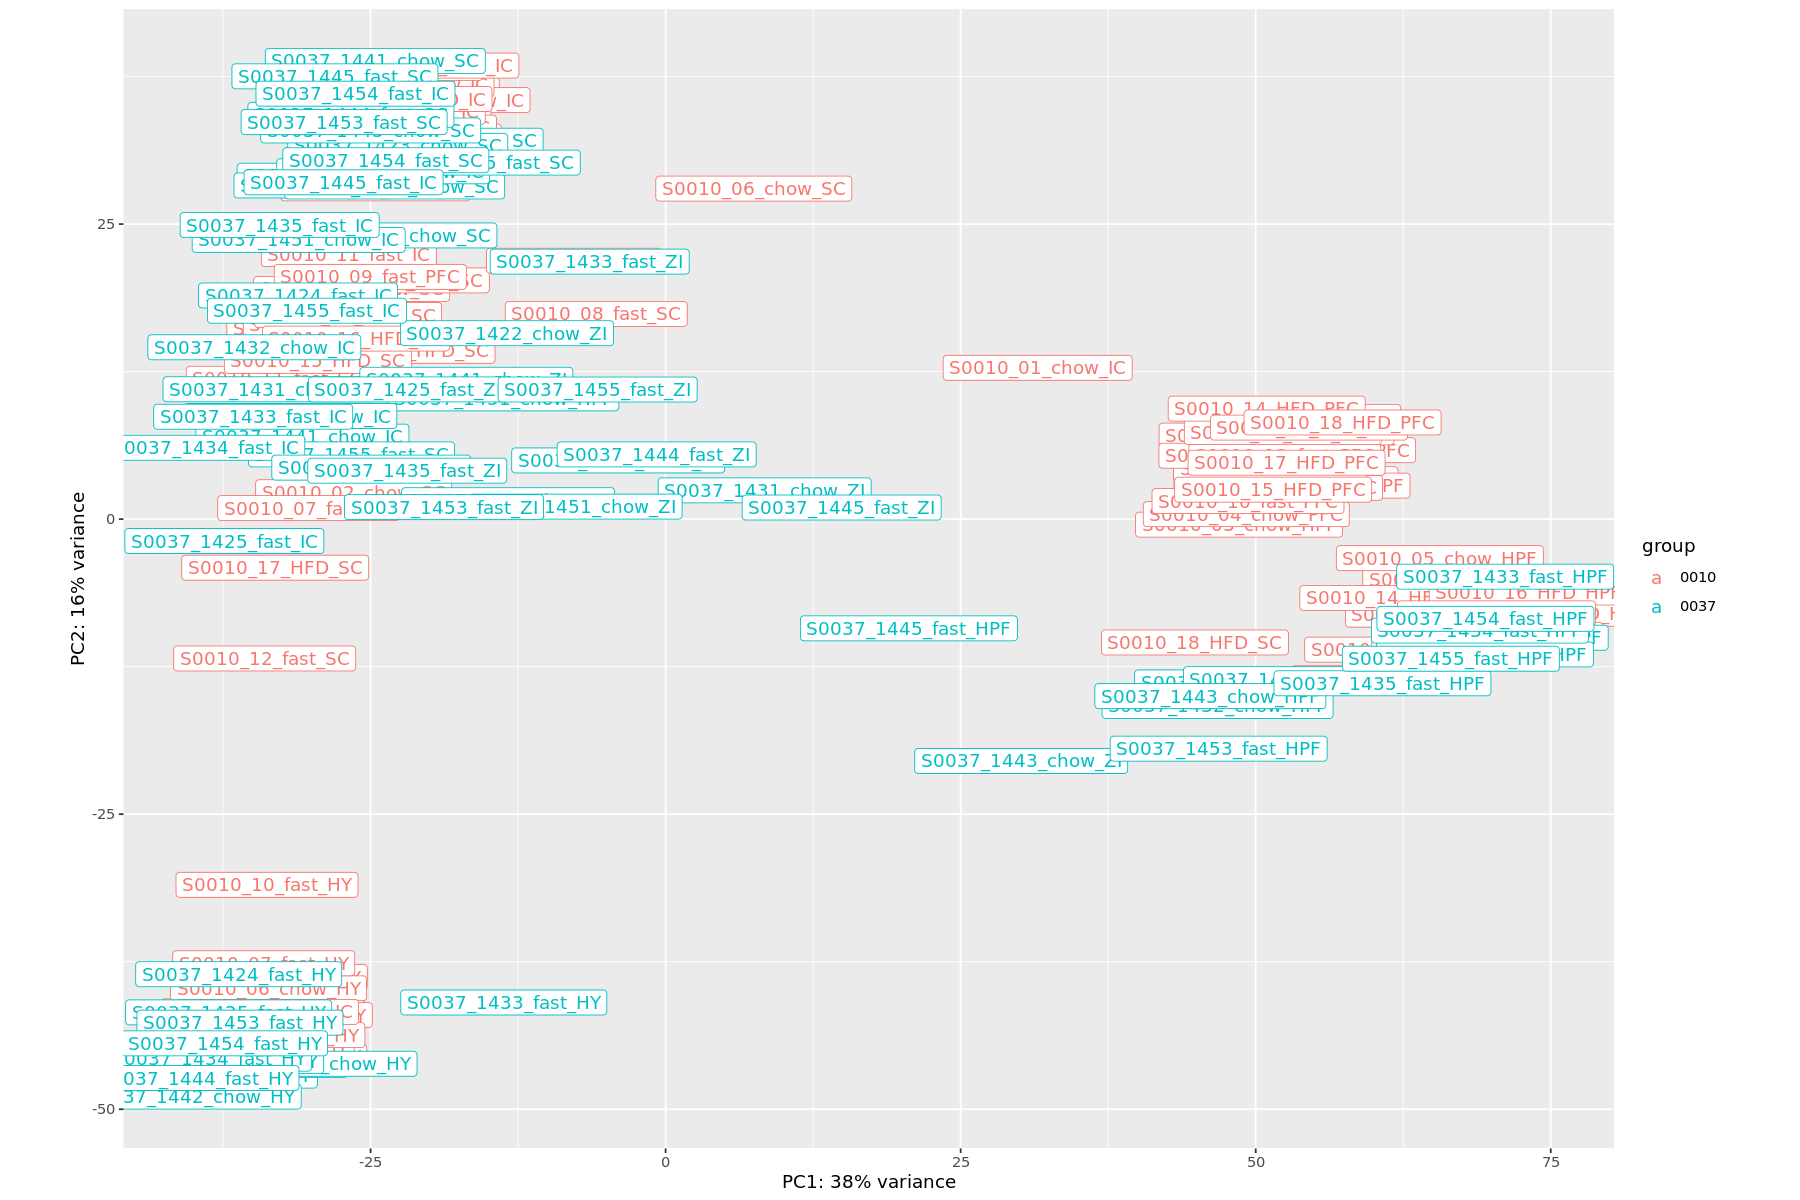

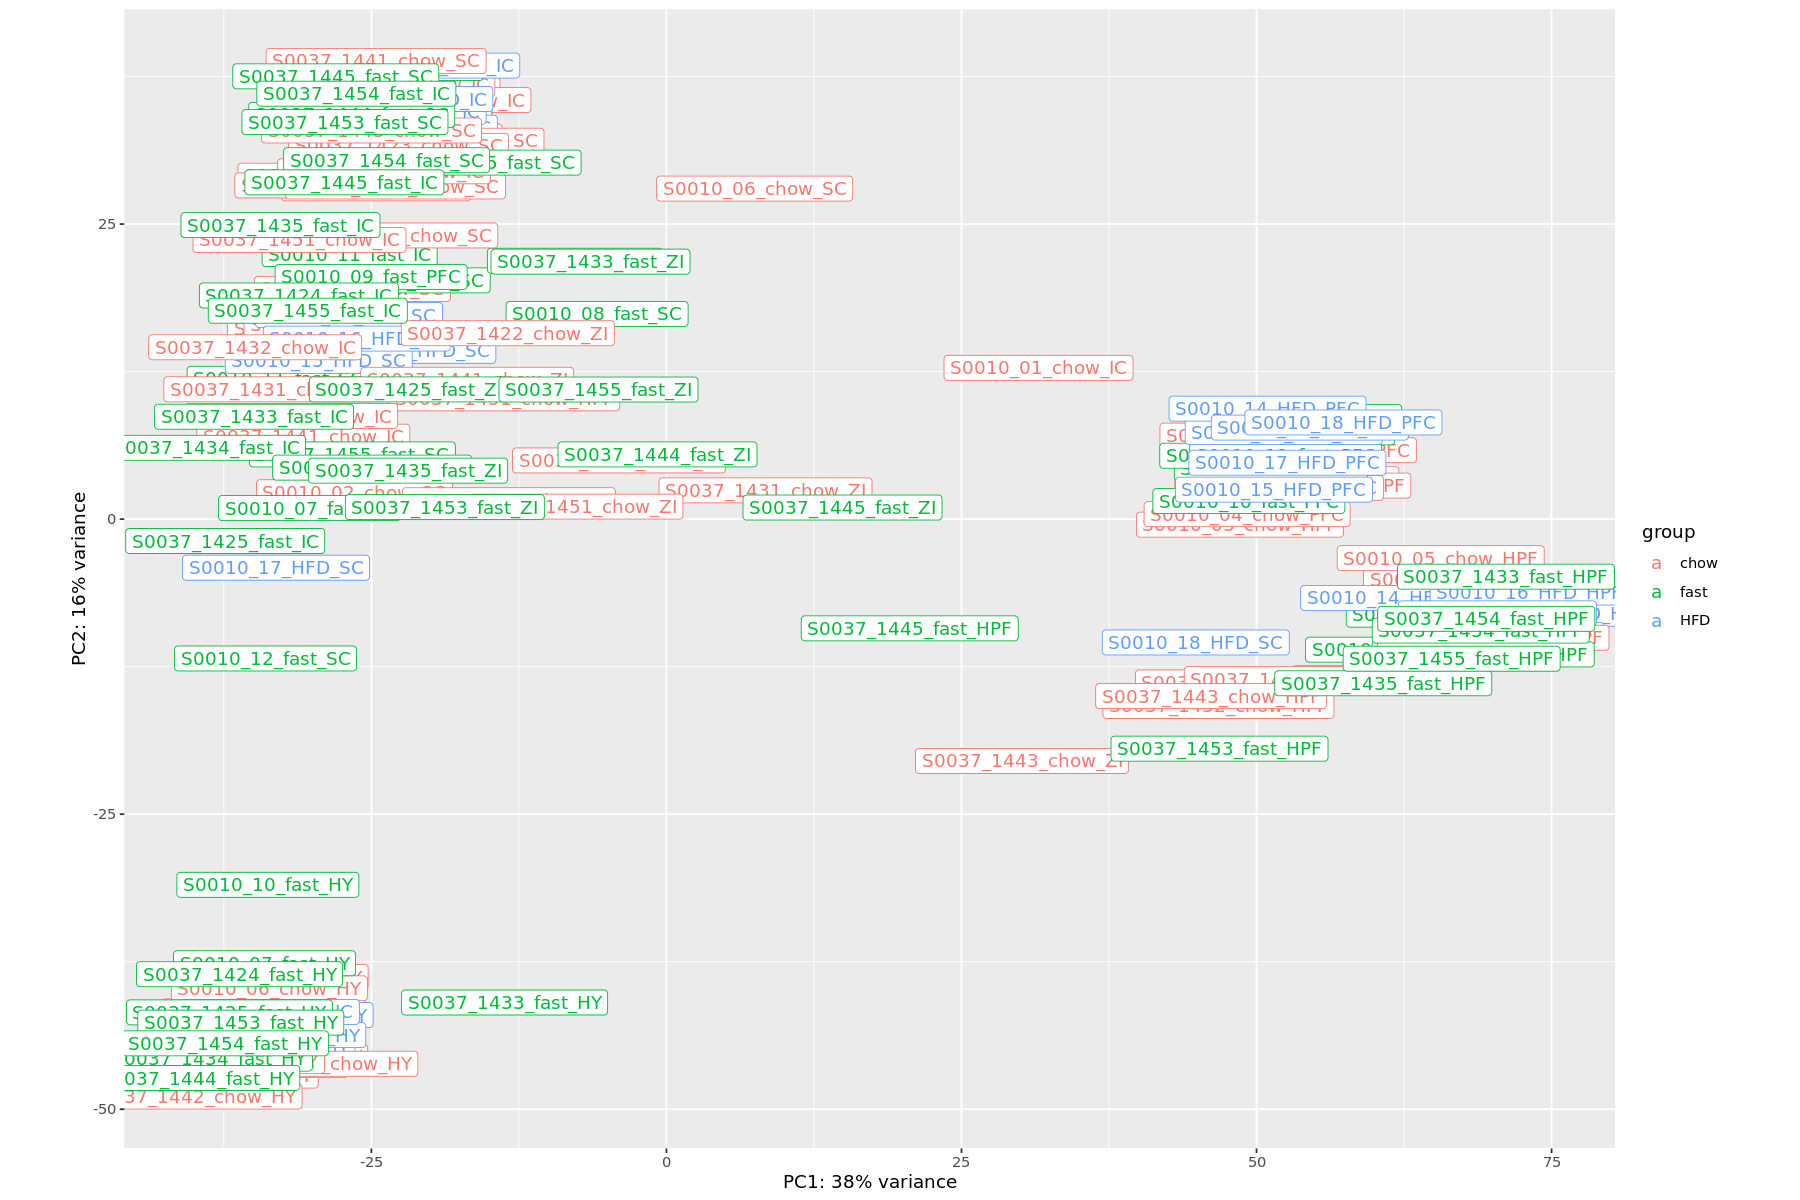

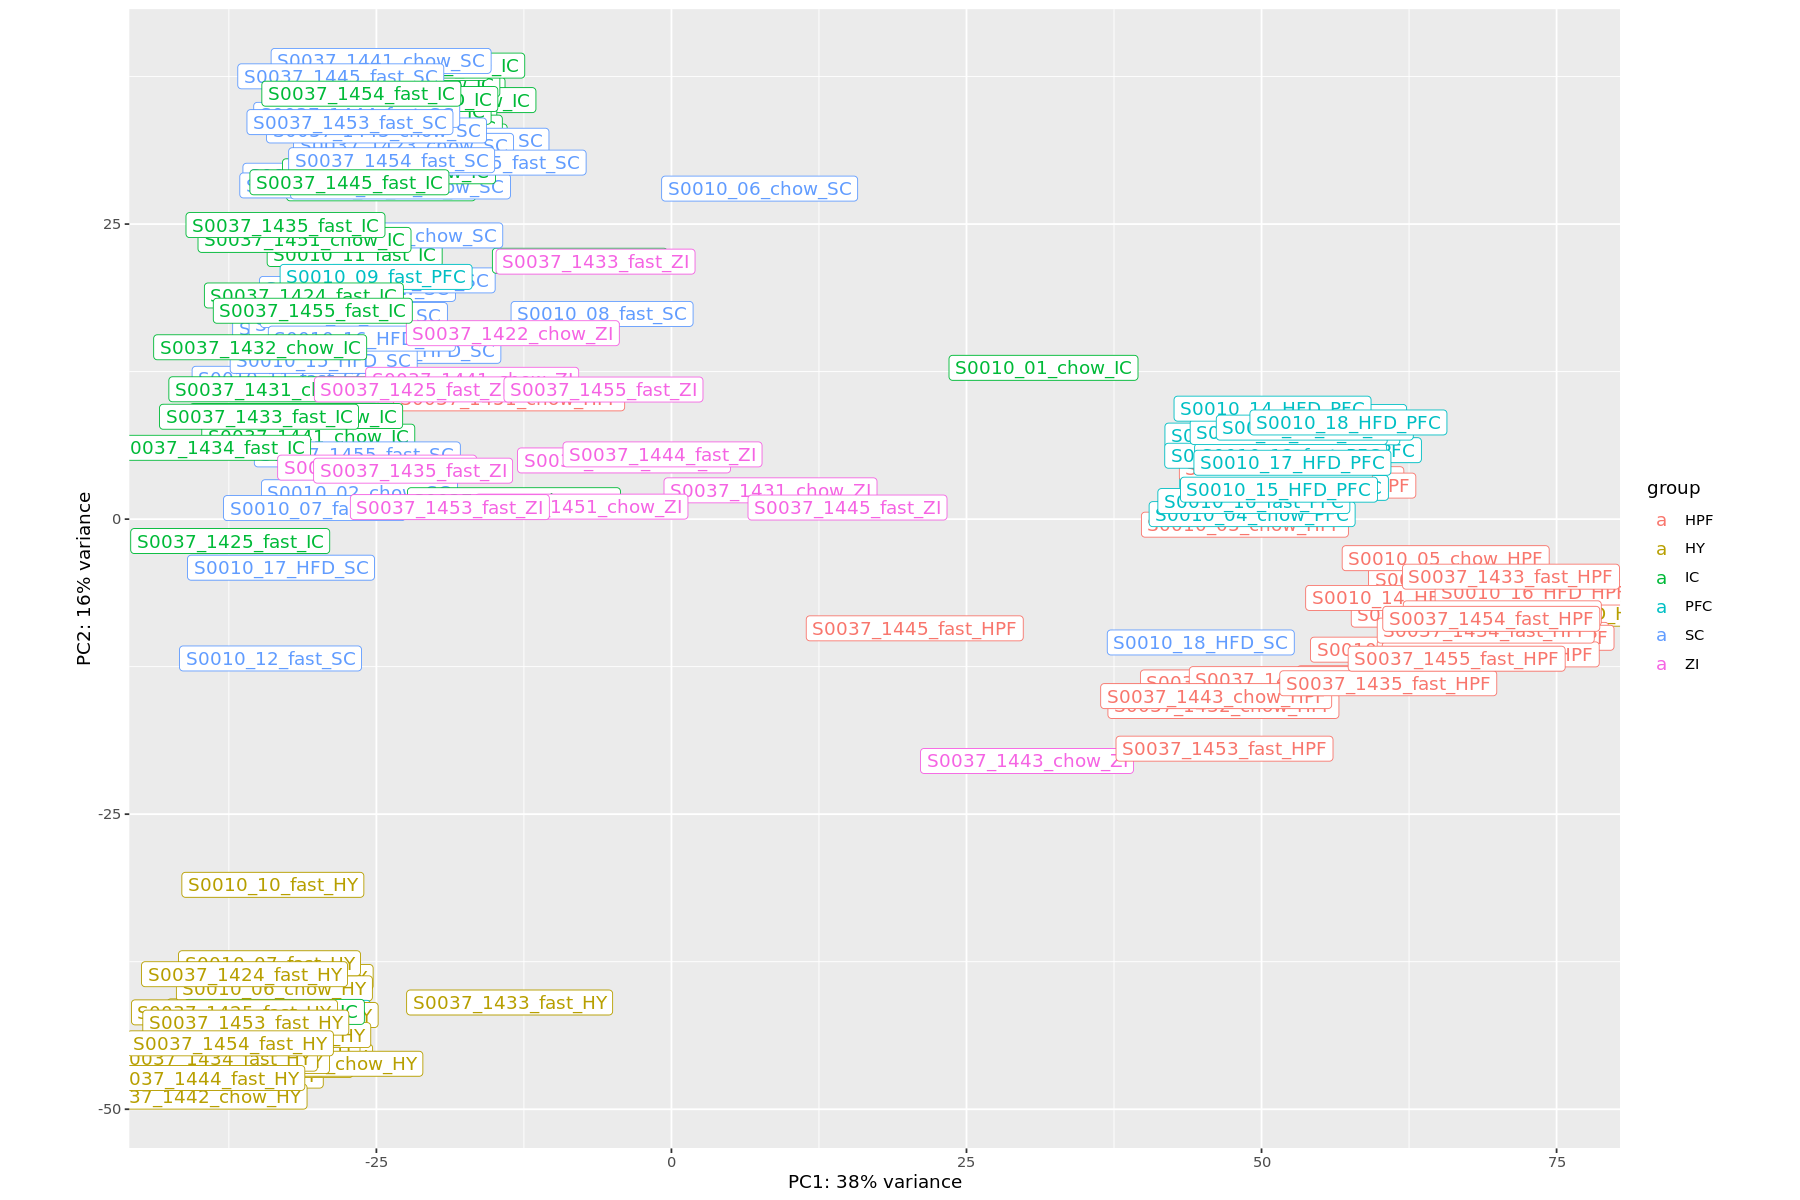

In [11]:
options(repr.plot.width=15, repr.plot.height=10)
plotPCA(preprocessed$vsd, intgroup=c("seq_run"), ntop=5000) + geom_label(aes(label = name))
plotPCA(preprocessed$vsd, intgroup=c("diet"), ntop=5000) + geom_label(aes(label = name))
plotPCA(preprocessed$vsd, intgroup=c("region"), ntop=5000) + geom_label(aes(label = name))

In [12]:
outliers_list$names_failing_all_region_pca_qc %>% length

[1] 12

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



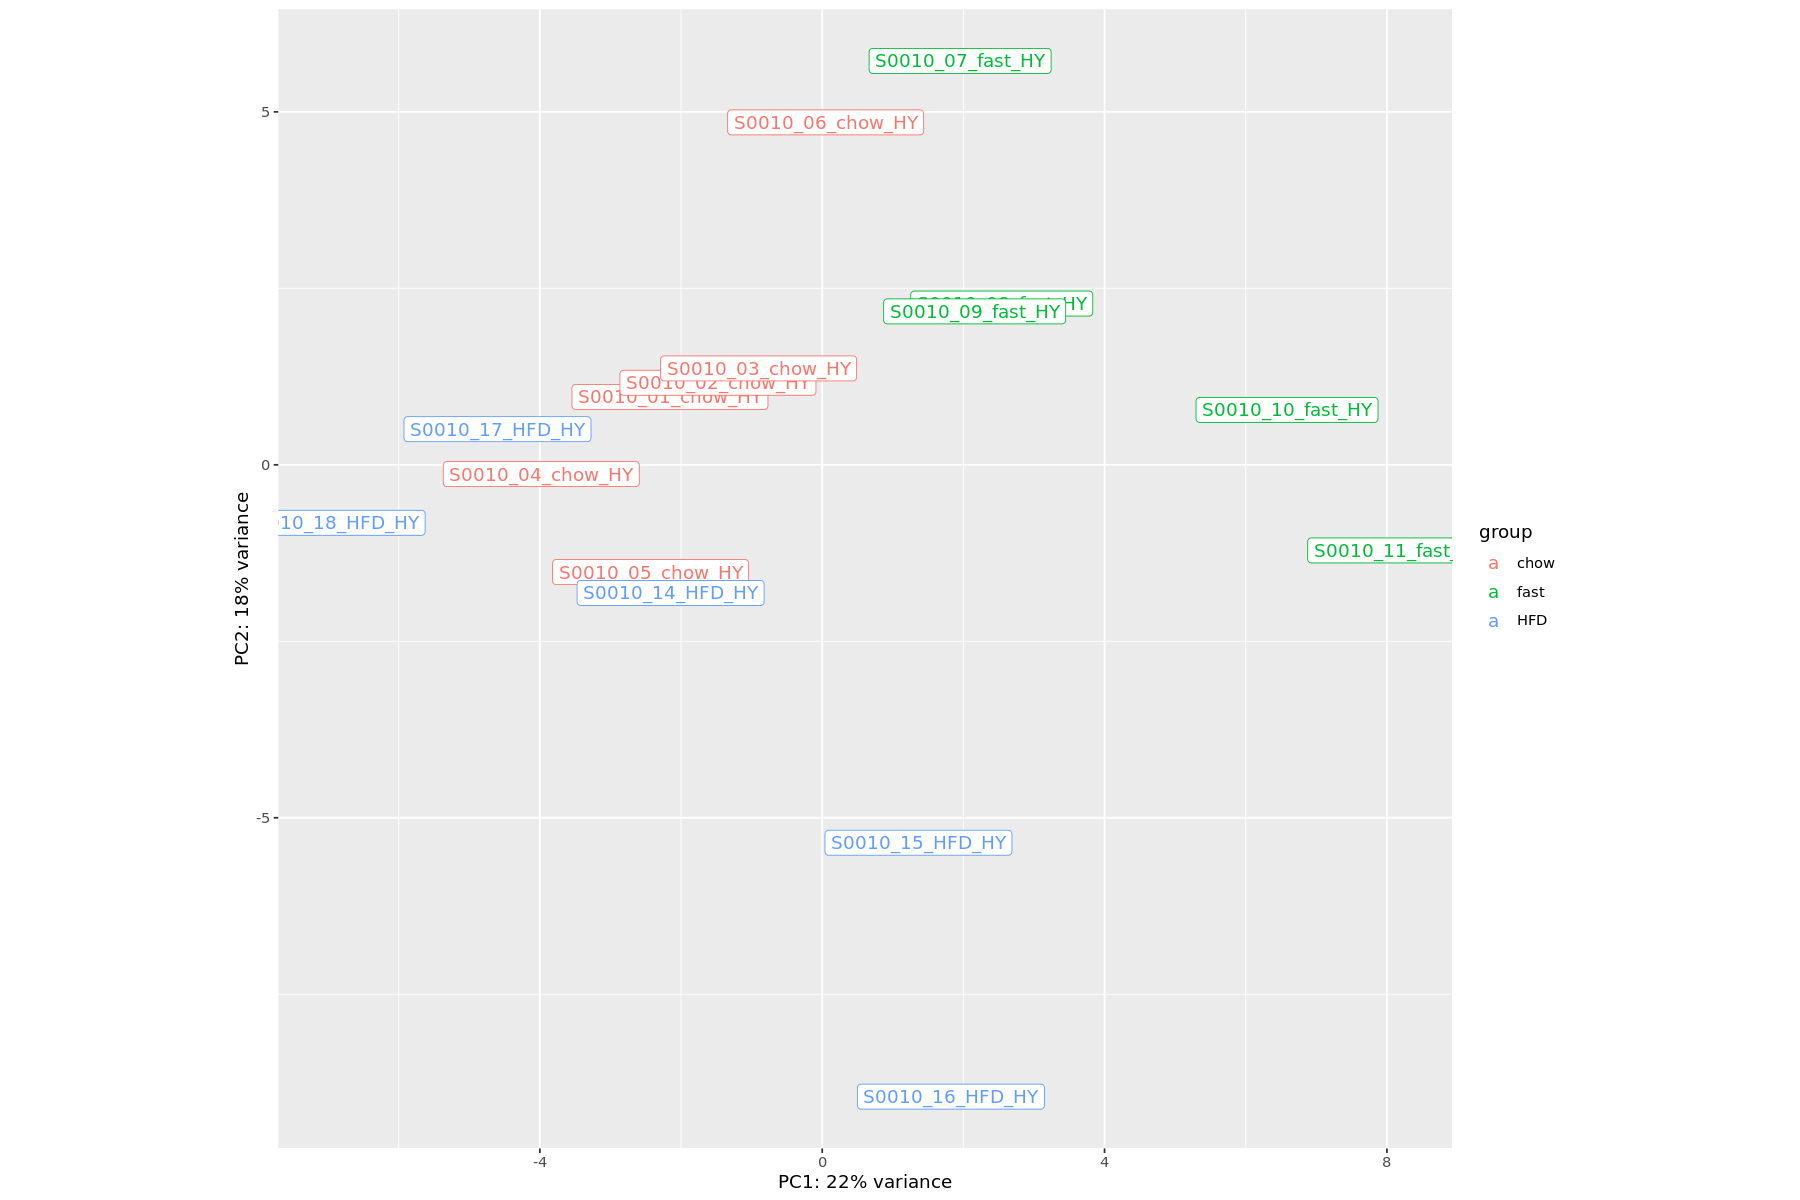

In [13]:
selected_run = '0010'
selected_region = 'HY'

keep_names = meta %>%
    filter(!is.na(filename)) %>%
    filter(!(name %in% outliers_list$names_failing_star_qc)) %>%
    filter(!(name %in% outliers_list$names_failing_all_region_pca_qc)) %>%
    filter(seq_run == selected_run) %>%
    filter(region == selected_region) %>%
    distinct(name) %>%
    pull(name)

preprocessed = do_preprocessing(counts, meta, keep_names) %>% do_pca %>% do_pca_detect_outliers(pcz_cutoff = 3)
outliers_list[[paste0('names_failing_', selected_run, '_', selected_region, '_pca_qc')]] = preprocessed$meta_f %>% filter(PCA_zregion_outlier) %>% distinct(name) %>% pull(name)
preprocessed_list[[paste0(selected_run, '_', selected_region)]] = preprocessed

options(repr.plot.width=15, repr.plot.height=10)
# plotPCA(preprocessed$vsd, intgroup=c("seq_run"), ntop=5000) + geom_label(aes(label = name))
plotPCA(preprocessed$vsd, intgroup=c("diet"), ntop=5000) + geom_label(aes(label = name))
# plotPCA(preprocessed$vsd, intgroup=c("region"), ntop=5000) + geom_label(aes(label = name))

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



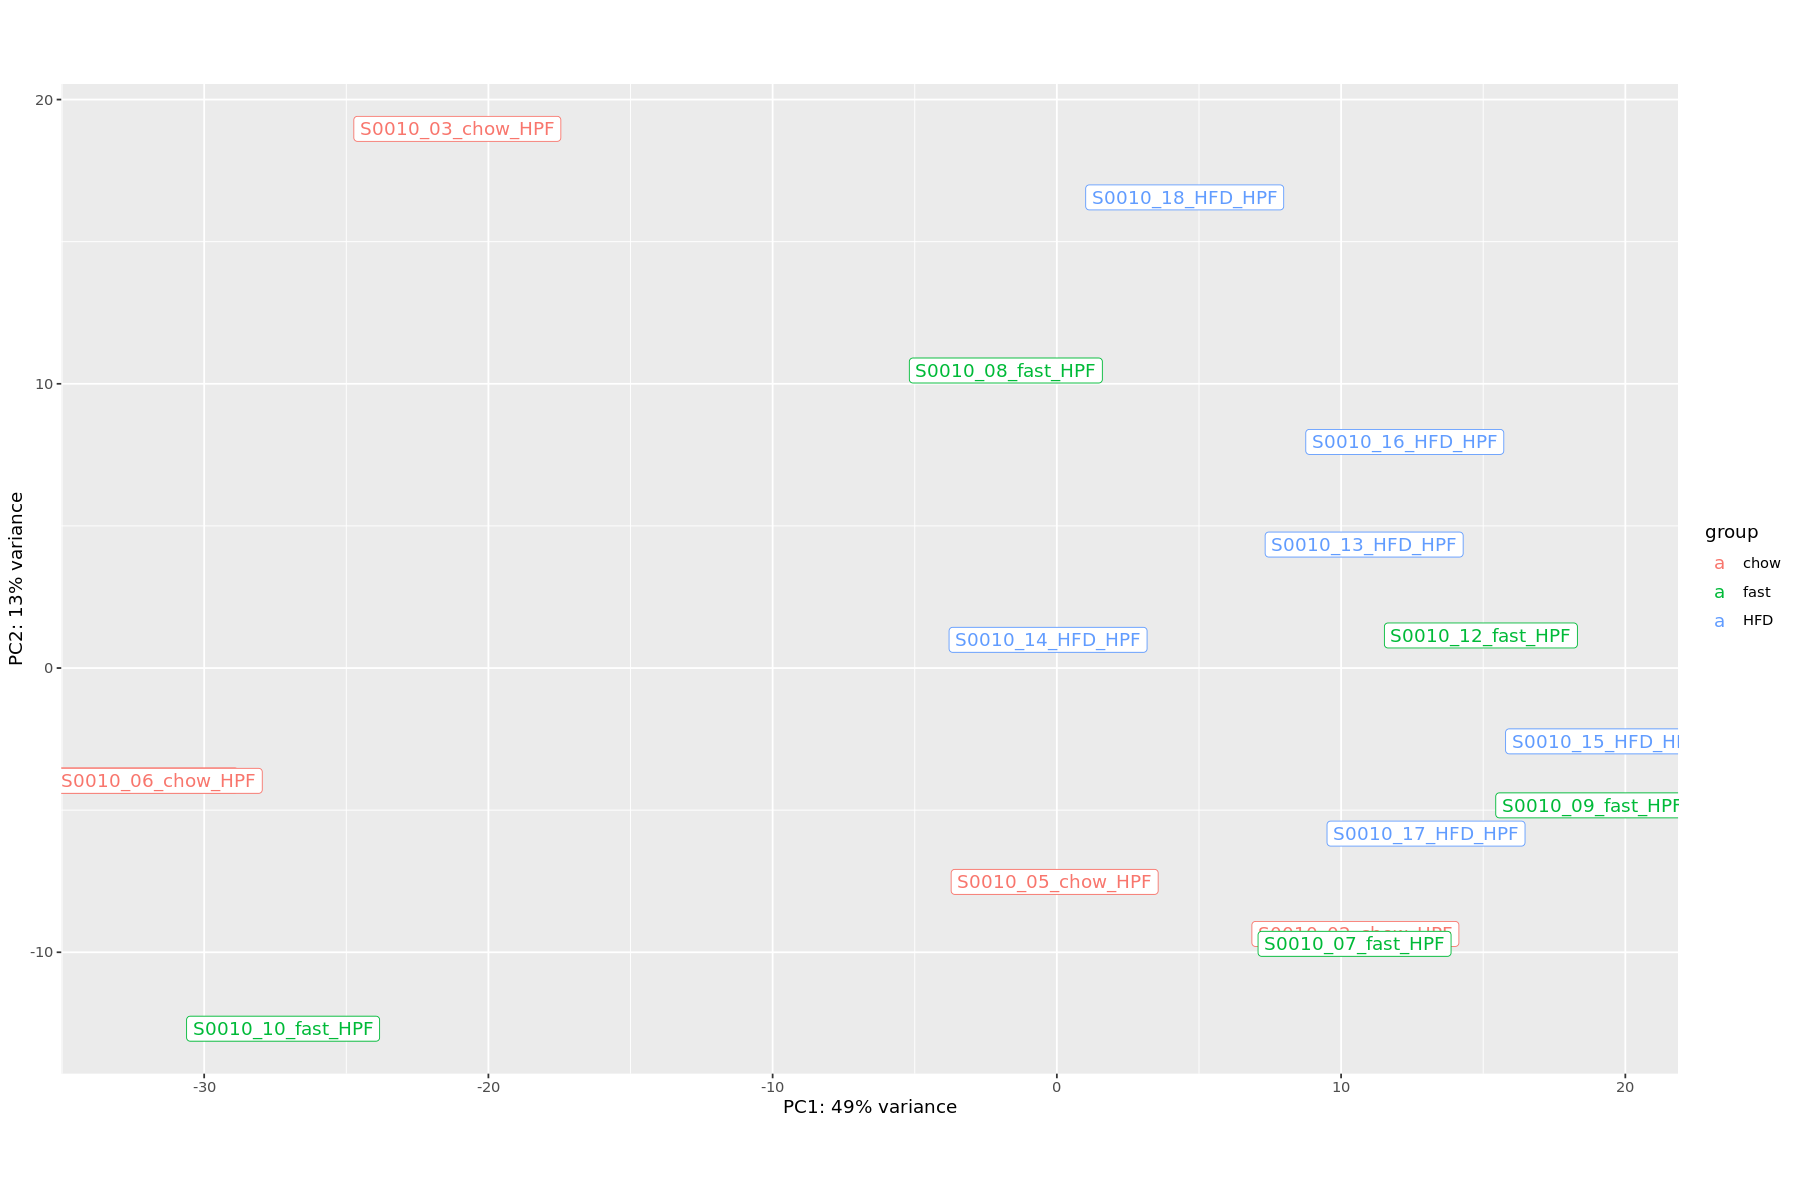

In [14]:
selected_run = '0010'
selected_region = 'HPF'

keep_names = meta %>%
    filter(!is.na(filename)) %>%
    filter(!(name %in% outliers_list$names_failing_star_qc)) %>%
    filter(!(name %in% outliers_list$names_failing_all_region_pca_qc)) %>%
    filter(seq_run == selected_run) %>%
    filter(region == selected_region) %>%
    distinct(name) %>%
    pull(name)

preprocessed = do_preprocessing(counts, meta, keep_names) %>% do_pca %>% do_pca_detect_outliers(pcz_cutoff = 3)
preprocessed_list[[paste0(selected_run, '_', selected_region)]] = preprocessed
outliers_list[[paste0('names_failing_', selected_run, '_', selected_region, '_pca_qc')]] = preprocessed$meta_f %>% filter(PCA_zregion_outlier) %>% distinct(name) %>% pull(name)

options(repr.plot.width=15, repr.plot.height=10)
# plotPCA(preprocessed$vsd, intgroup=c("seq_run"), ntop=5000) + geom_label(aes(label = name))
plotPCA(preprocessed$vsd, intgroup=c("diet"), ntop=5000) + geom_label(aes(label = name))
# plotPCA(preprocessed$vsd, intgroup=c("region"), ntop=5000) + geom_label(aes(label = name))

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



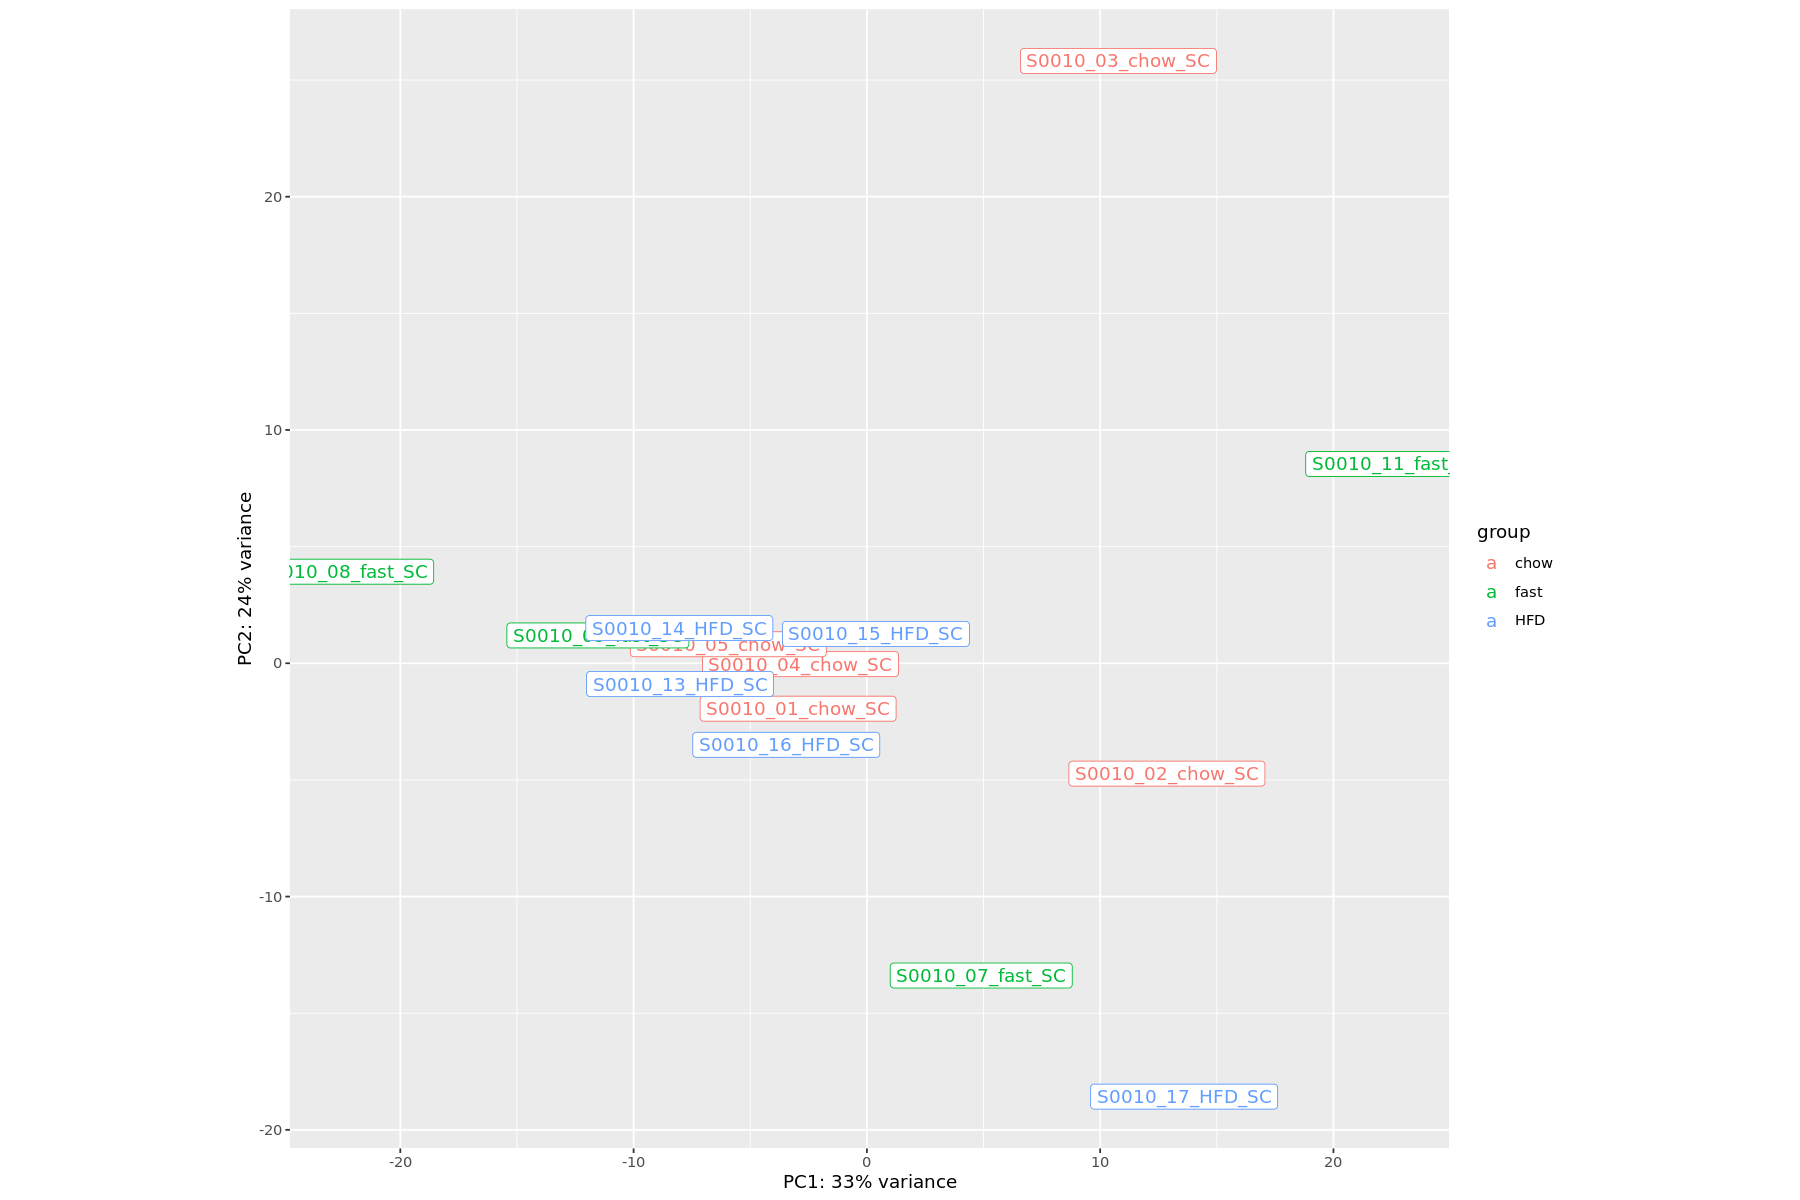

In [15]:
selected_run = '0010'
selected_region = 'SC'

keep_names = meta %>%
    filter(!is.na(filename)) %>%
    filter(!(name %in% outliers_list$names_failing_star_qc)) %>%
    filter(!(name %in% outliers_list$names_failing_all_region_pca_qc)) %>%
    filter(seq_run == selected_run) %>%
    filter(region == selected_region) %>%
    distinct(name) %>%
    pull(name)

preprocessed = do_preprocessing(counts, meta, keep_names) %>% do_pca %>% do_pca_detect_outliers(pcz_cutoff = 3)
preprocessed_list[[paste0(selected_run, '_', selected_region)]] = preprocessed
outliers_list[[paste0('names_failing_', selected_run, '_', selected_region, '_pca_qc')]] = preprocessed$meta_f %>% filter(PCA_zregion_outlier) %>% distinct(name) %>% pull(name)

options(repr.plot.width=15, repr.plot.height=10)
# plotPCA(preprocessed$vsd, intgroup=c("seq_run"), ntop=5000) + geom_label(aes(label = name))
plotPCA(preprocessed$vsd, intgroup=c("diet"), ntop=5000) + geom_label(aes(label = name))
# plotPCA(preprocessed$vsd, intgroup=c("region"), ntop=5000) + geom_label(aes(label = name))

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



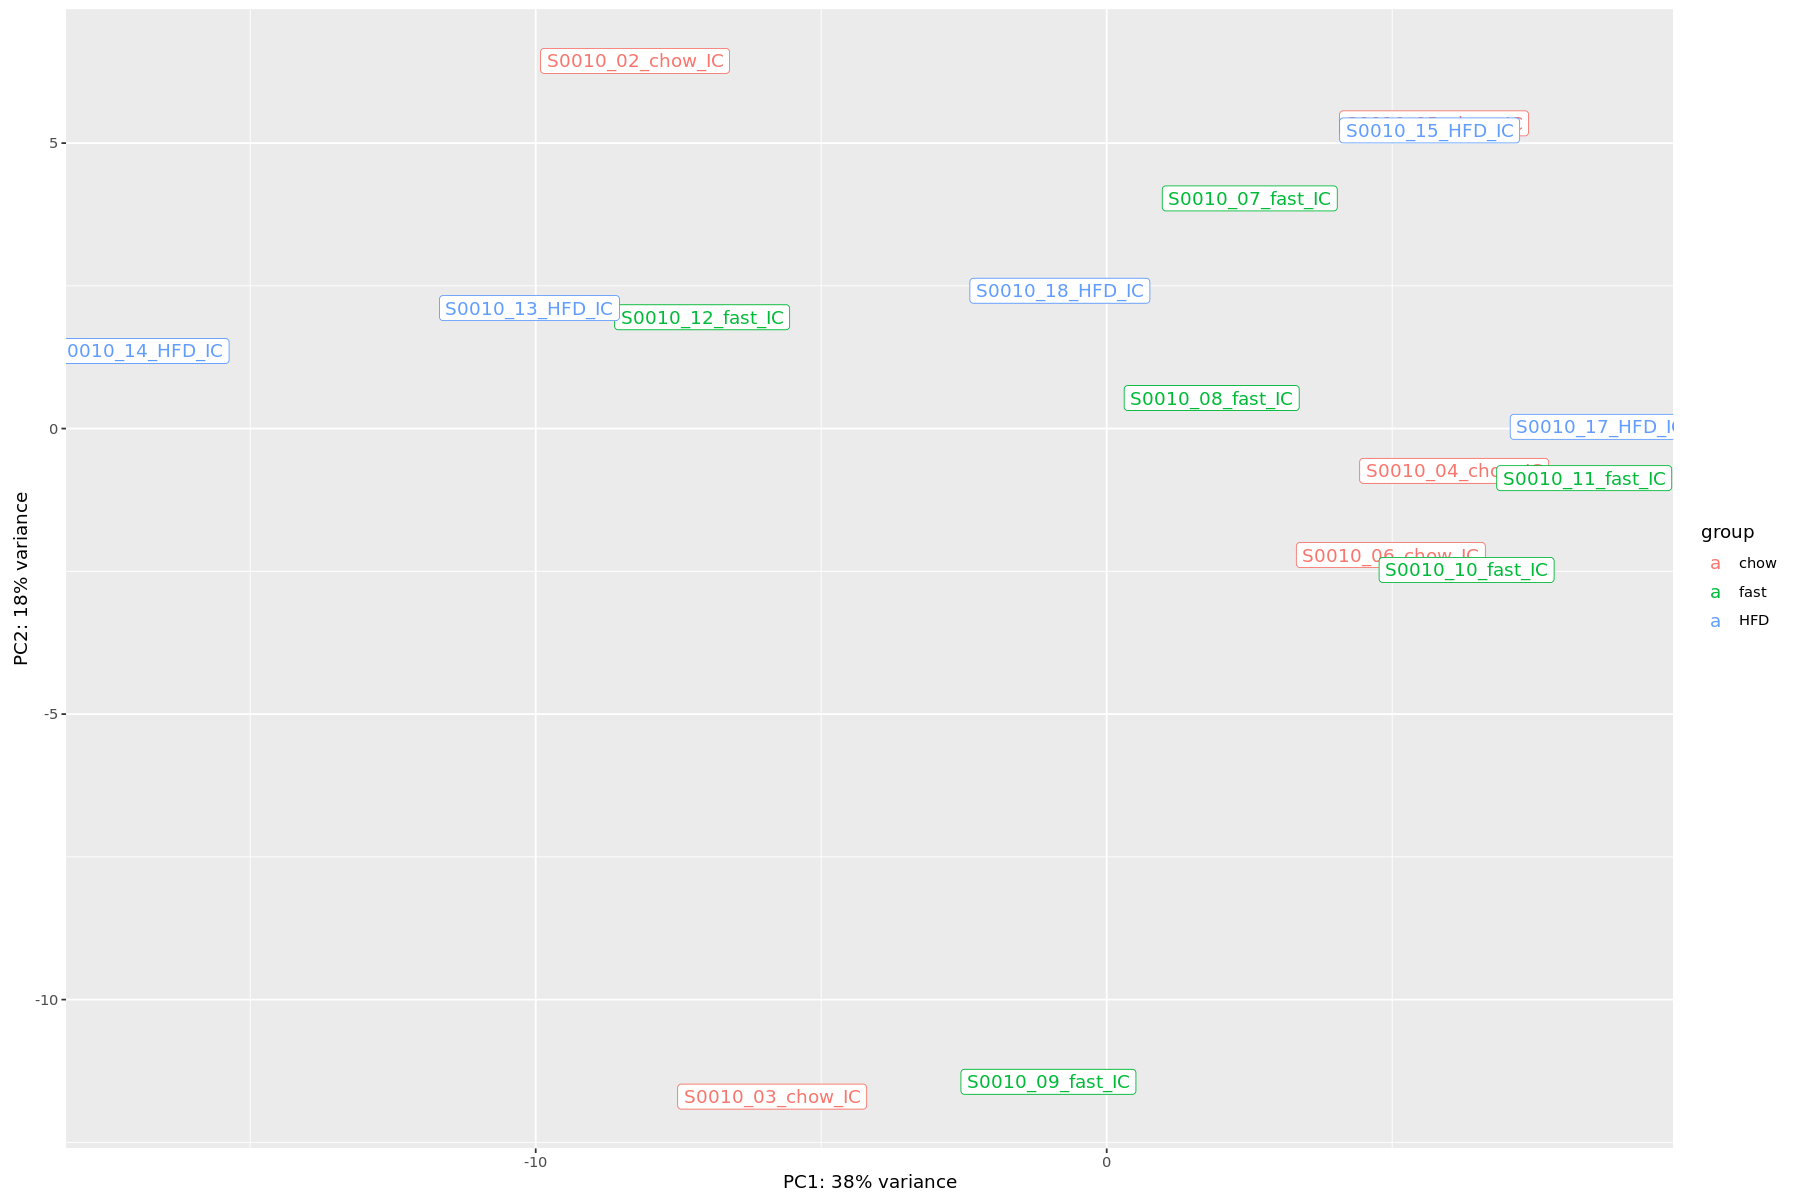

In [16]:
selected_run = '0010'
selected_region = 'IC'

keep_names = meta %>%
    filter(!is.na(filename)) %>%
    filter(!(name %in% outliers_list$names_failing_star_qc)) %>%
    filter(!(name %in% outliers_list$names_failing_all_region_pca_qc)) %>%
    filter(seq_run == selected_run) %>%
    filter(region == selected_region) %>%
    distinct(name) %>%
    pull(name)

preprocessed = do_preprocessing(counts, meta, keep_names) %>% do_pca %>% do_pca_detect_outliers(pcz_cutoff = 3)
preprocessed_list[[paste0(selected_run, '_', selected_region)]] = preprocessed
outliers_list[[paste0('names_failing_', selected_run, '_', selected_region, '_pca_qc')]] = preprocessed$meta_f %>% filter(PCA_zregion_outlier) %>% distinct(name) %>% pull(name)

options(repr.plot.width=15, repr.plot.height=10)
# plotPCA(preprocessed$vsd, intgroup=c("seq_run"), ntop=5000) + geom_label(aes(label = name))
plotPCA(preprocessed$vsd, intgroup=c("diet"), ntop=5000) + geom_label(aes(label = name))
# plotPCA(preprocessed$vsd, intgroup=c("region"), ntop=5000) + geom_label(aes(label = name))

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



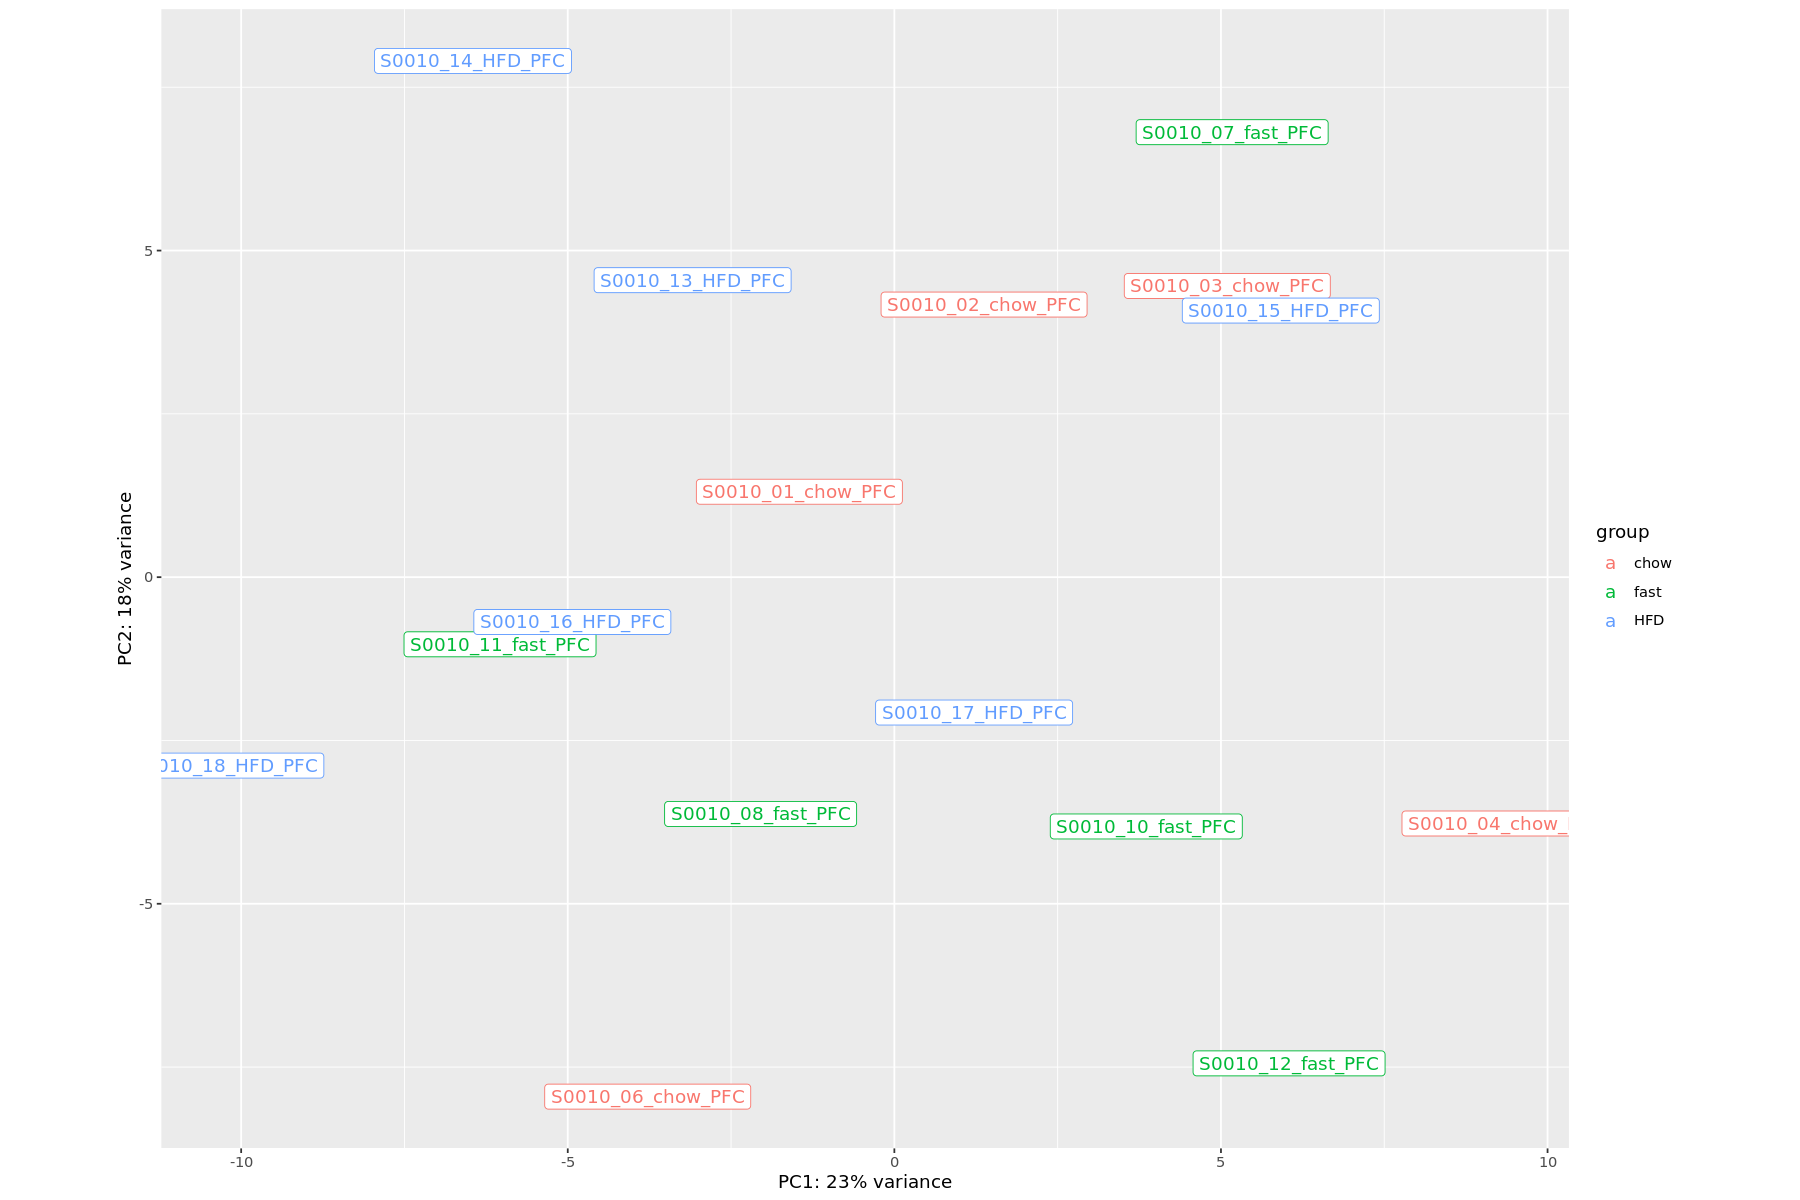

In [17]:
selected_run = '0010'
selected_region = 'PFC'

keep_names = meta %>%
    filter(!is.na(filename)) %>%
    filter(!(name %in% outliers_list$names_failing_star_qc)) %>%
    filter(!(name %in% outliers_list$names_failing_all_region_pca_qc)) %>%
    filter(seq_run == selected_run) %>%
    filter(region == selected_region) %>%
    distinct(name) %>%
    pull(name)

preprocessed = do_preprocessing(counts, meta, keep_names) %>% do_pca %>% do_pca_detect_outliers(pcz_cutoff = 3)
preprocessed_list[[paste0(selected_run, '_', selected_region)]] = preprocessed
outliers_list[[paste0('names_failing_', selected_run, '_', selected_region, '_pca_qc')]] = preprocessed$meta_f %>% filter(PCA_zregion_outlier) %>% distinct(name) %>% pull(name)

options(repr.plot.width=15, repr.plot.height=10)
# plotPCA(preprocessed$vsd, intgroup=c("seq_run"), ntop=5000) + geom_label(aes(label = name))
plotPCA(preprocessed$vsd, intgroup=c("diet"), ntop=5000) + geom_label(aes(label = name))
# plotPCA(preprocessed$vsd, intgroup=c("region"), ntop=5000) + geom_label(aes(label = name))

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 70 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



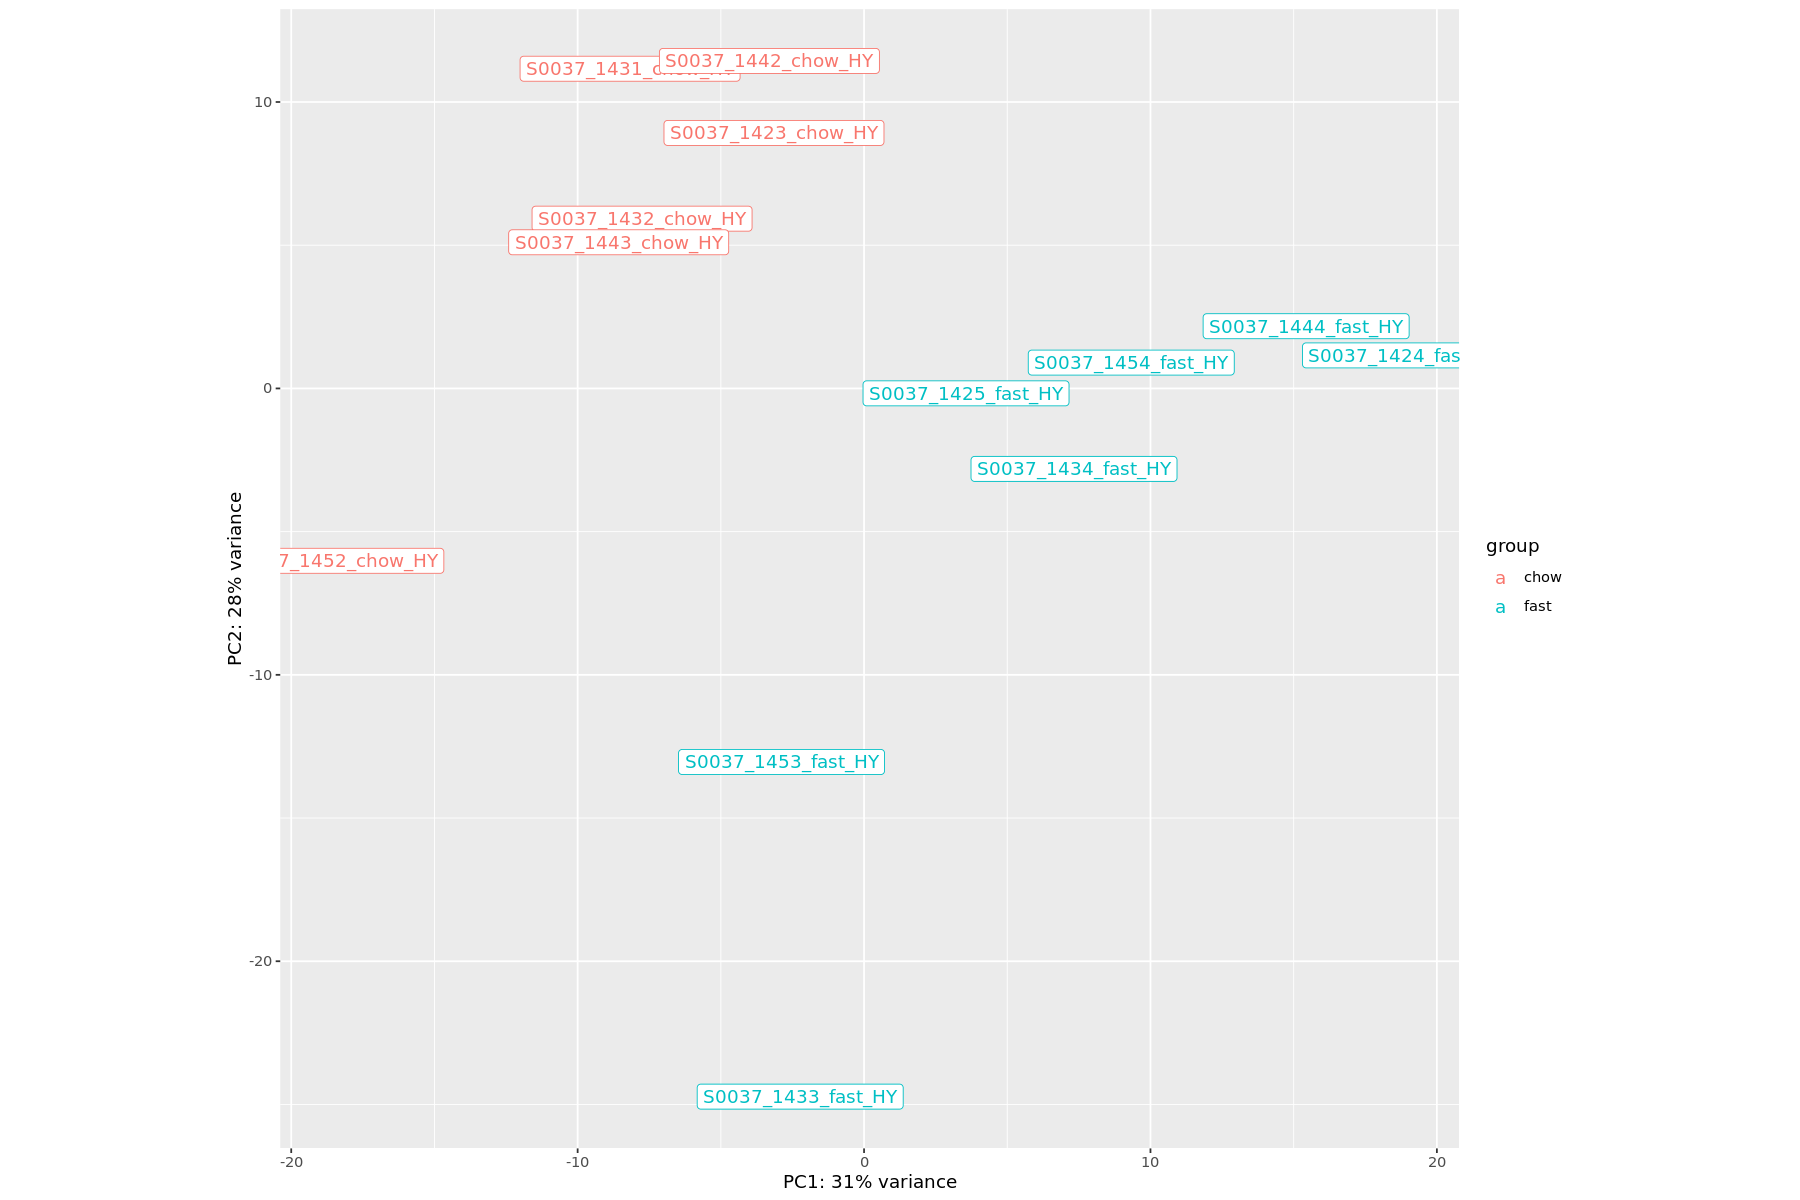

In [18]:
selected_run = '0037'
selected_region = 'HY'

keep_names = meta %>%
    filter(!is.na(filename)) %>%
    filter(!(name %in% outliers_list$names_failing_star_qc)) %>%
    filter(!(name %in% outliers_list$names_failing_all_region_pca_qc)) %>%
    filter(seq_run == selected_run) %>%
    filter(region == selected_region) %>%
    distinct(name) %>%
    pull(name)

preprocessed = do_preprocessing(counts, meta, keep_names) %>% do_pca %>% do_pca_detect_outliers(pcz_cutoff = 3)
preprocessed_list[[paste0(selected_run, '_', selected_region)]] = preprocessed
outliers_list[[paste0('names_failing_', selected_run, '_', selected_region, '_pca_qc')]] = preprocessed$meta_f %>% filter(PCA_zregion_outlier) %>% distinct(name) %>% pull(name)

options(repr.plot.width=15, repr.plot.height=10)
# plotPCA(preprocessed$vsd, intgroup=c("seq_run"), ntop=5000) + geom_label(aes(label = name))
plotPCA(preprocessed$vsd, intgroup=c("diet"), ntop=5000) + geom_label(aes(label = name))
# plotPCA(preprocessed$vsd, intgroup=c("region"), ntop=5000) + geom_label(aes(label = name))

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 247 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



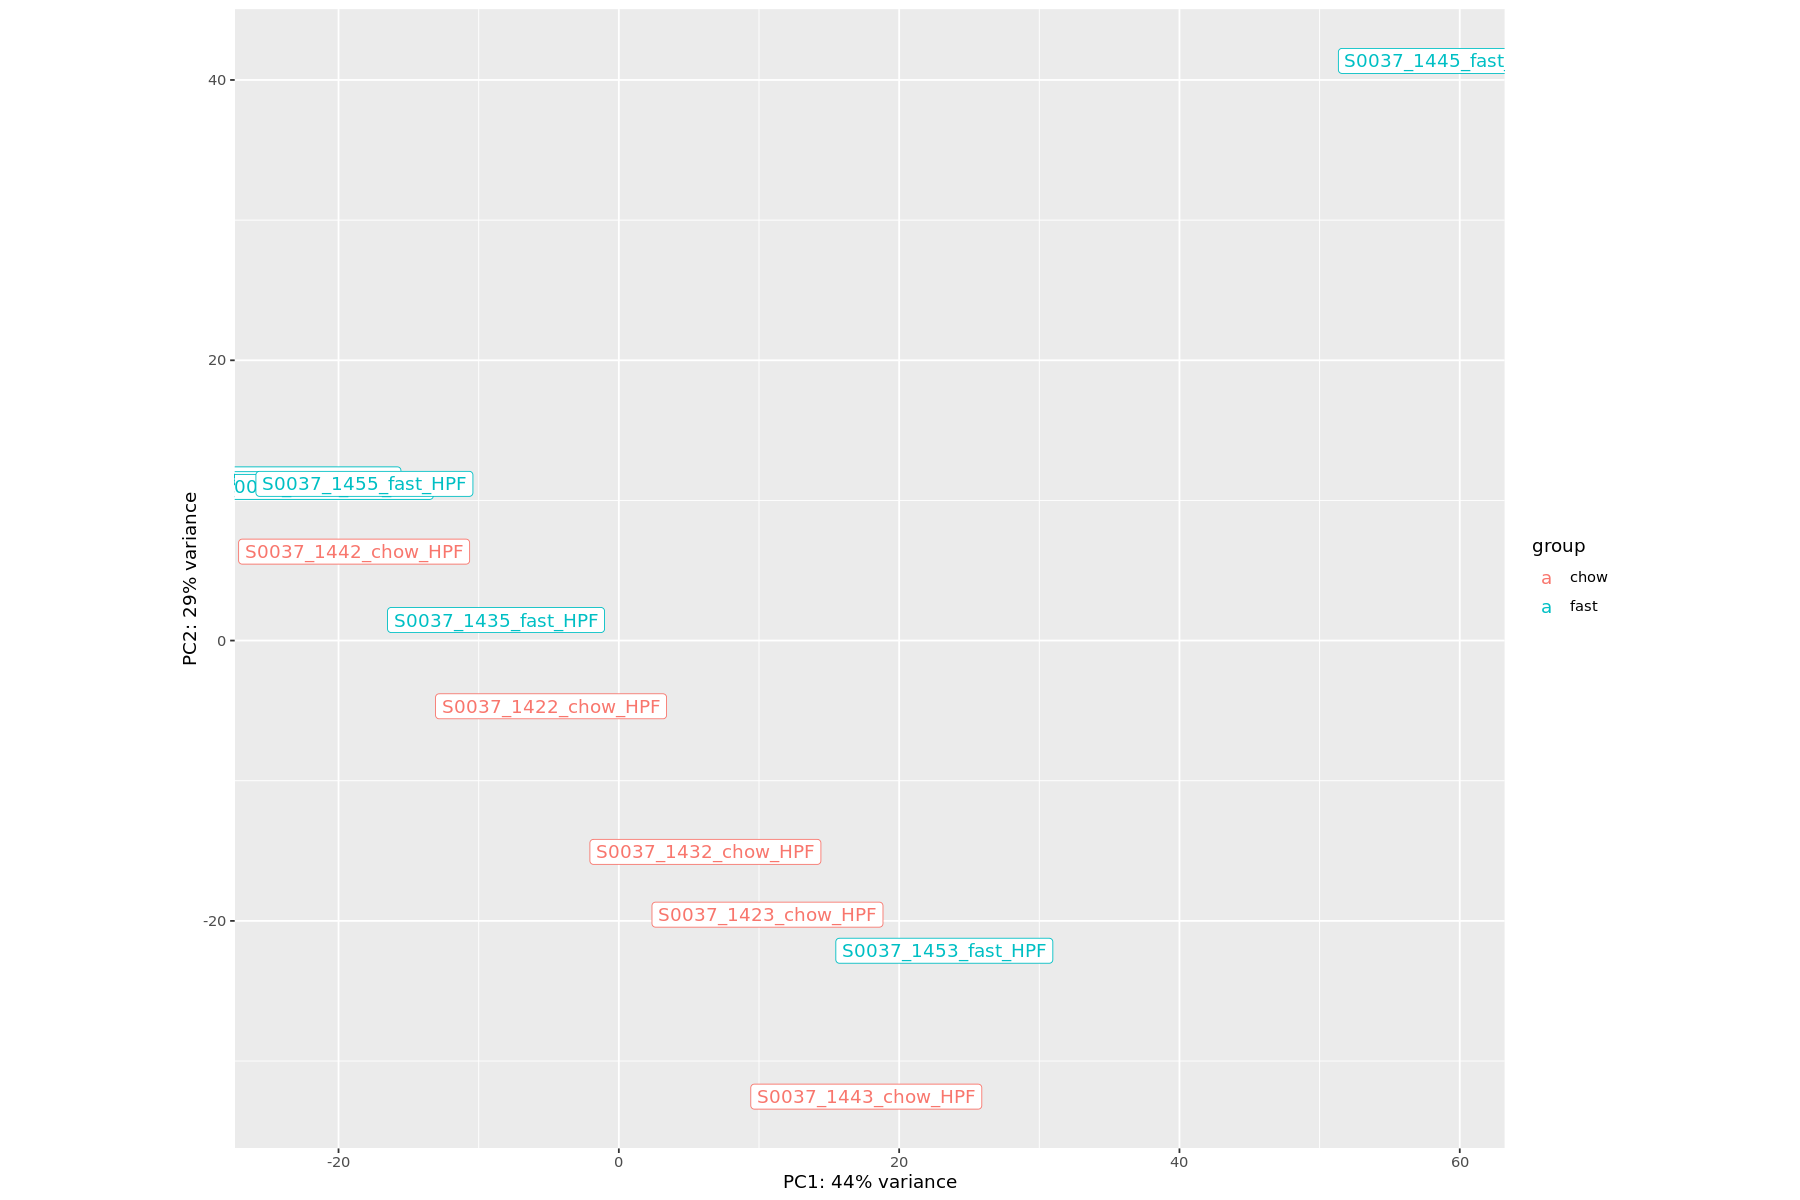

In [19]:
selected_run = '0037'
selected_region = 'HPF'

keep_names = meta %>%
    filter(!is.na(filename)) %>%
    filter(!(name %in% outliers_list$names_failing_star_qc)) %>%
    filter(!(name %in% outliers_list$names_failing_all_region_pca_qc)) %>%
    filter(seq_run == selected_run) %>%
    filter(region == selected_region) %>%
    distinct(name) %>%
    pull(name)

preprocessed = do_preprocessing(counts, meta, keep_names) %>% do_pca %>% do_pca_detect_outliers(pcz_cutoff = 3)
preprocessed_list[[paste0(selected_run, '_', selected_region)]] = preprocessed
outliers_list[[paste0('names_failing_', selected_run, '_', selected_region, '_pca_qc')]] = preprocessed$meta_f %>% filter(PCA_zregion_outlier) %>% distinct(name) %>% pull(name)

options(repr.plot.width=15, repr.plot.height=10)
# plotPCA(preprocessed$vsd, intgroup=c("seq_run"), ntop=5000) + geom_label(aes(label = name))
plotPCA(preprocessed$vsd, intgroup=c("diet"), ntop=5000) + geom_label(aes(label = name))
# plotPCA(preprocessed$vsd, intgroup=c("region"), ntop=5000) + geom_label(aes(label = name))

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 14 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



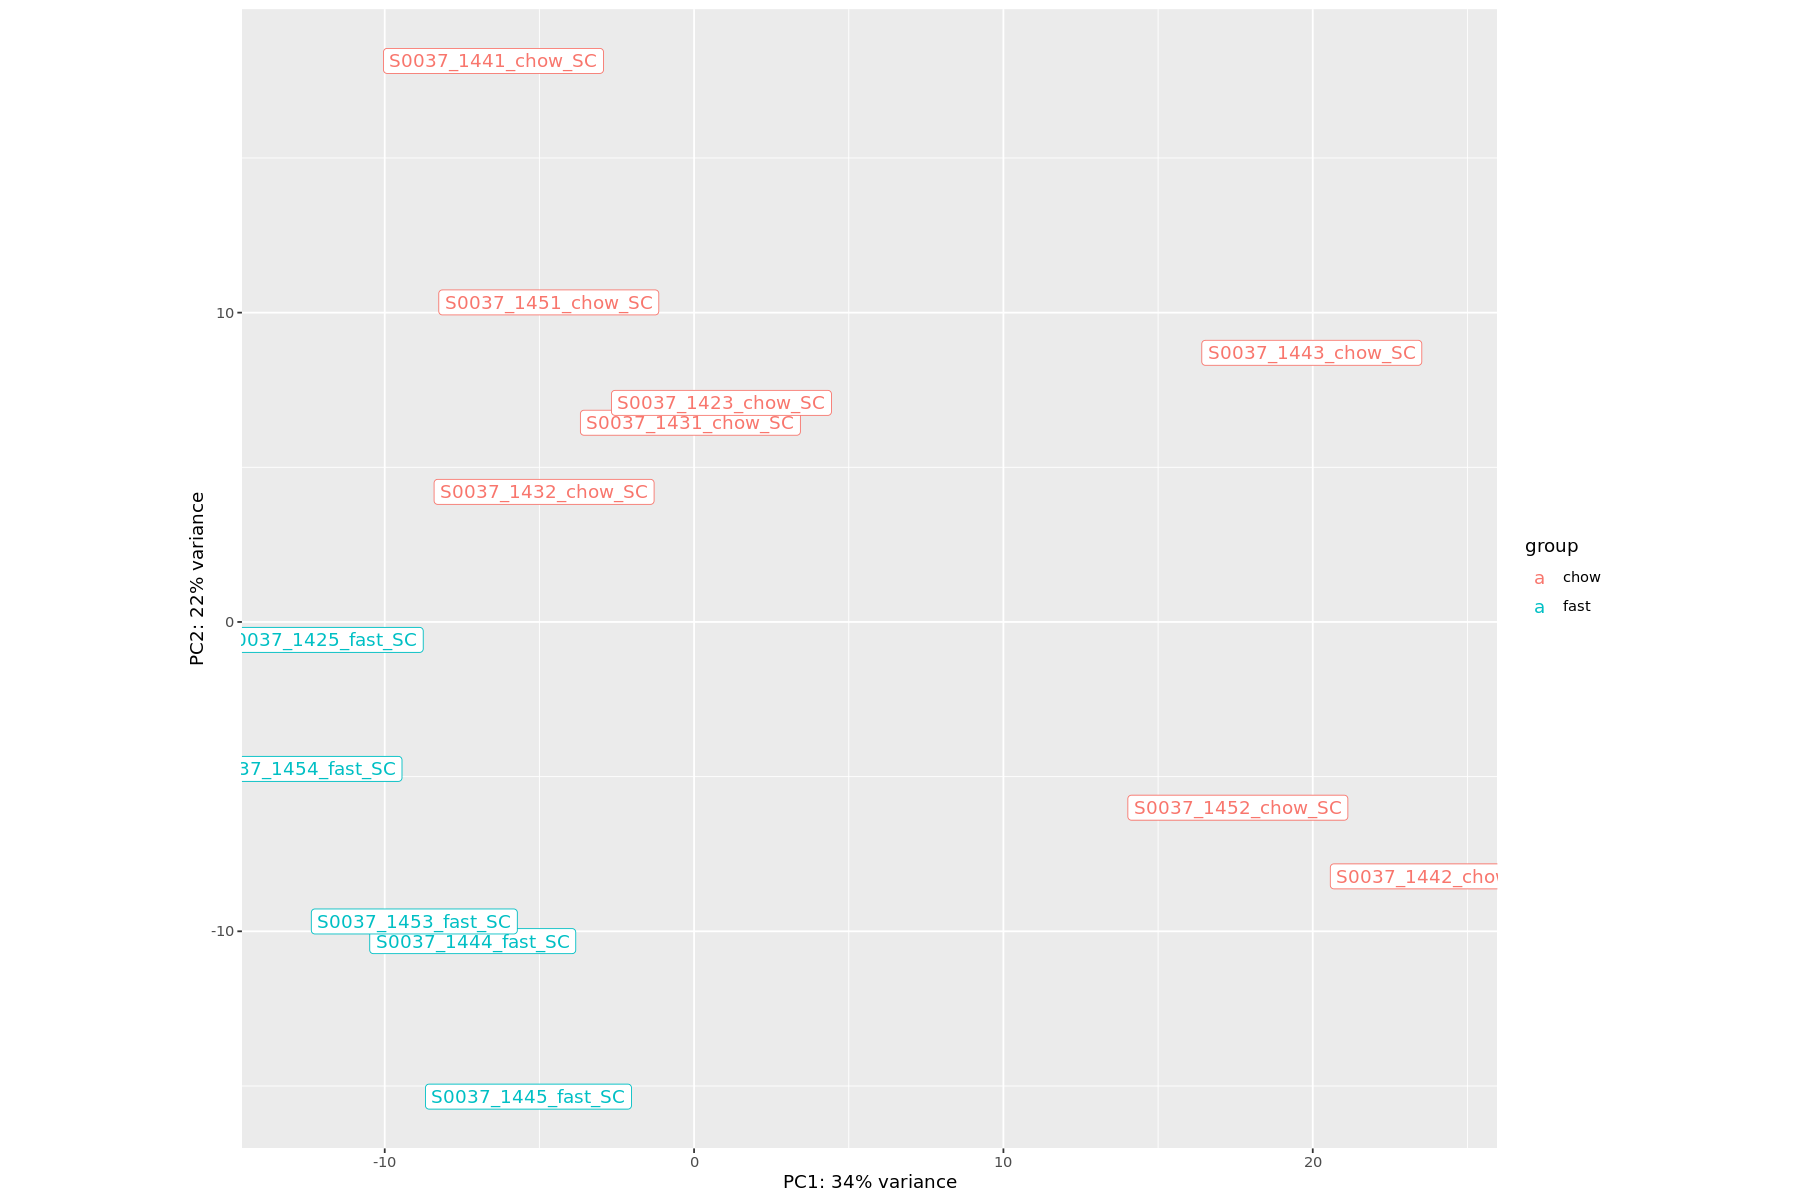

In [20]:
selected_run = '0037'
selected_region = 'SC'

keep_names = meta %>%
    filter(!is.na(filename)) %>%
    filter(!(name %in% outliers_list$names_failing_star_qc)) %>%
    filter(!(name %in% outliers_list$names_failing_all_region_pca_qc)) %>%
    filter(seq_run == selected_run) %>%
    filter(region == selected_region) %>%
    distinct(name) %>%
    pull(name)

preprocessed = do_preprocessing(counts, meta, keep_names) %>% do_pca %>% do_pca_detect_outliers(pcz_cutoff = 3)
preprocessed_list[[paste0(selected_run, '_', selected_region)]] = preprocessed
outliers_list[[paste0('names_failing_', selected_run, '_', selected_region, '_pca_qc')]] = preprocessed$meta_f %>% filter(PCA_zregion_outlier) %>% distinct(name) %>% pull(name)

options(repr.plot.width=15, repr.plot.height=10)
# plotPCA(preprocessed$vsd, intgroup=c("seq_run"), ntop=5000) + geom_label(aes(label = name))
plotPCA(preprocessed$vsd, intgroup=c("diet"), ntop=5000) + geom_label(aes(label = name))
# plotPCA(preprocessed$vsd, intgroup=c("region"), ntop=5000) + geom_label(aes(label = name))

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 69 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



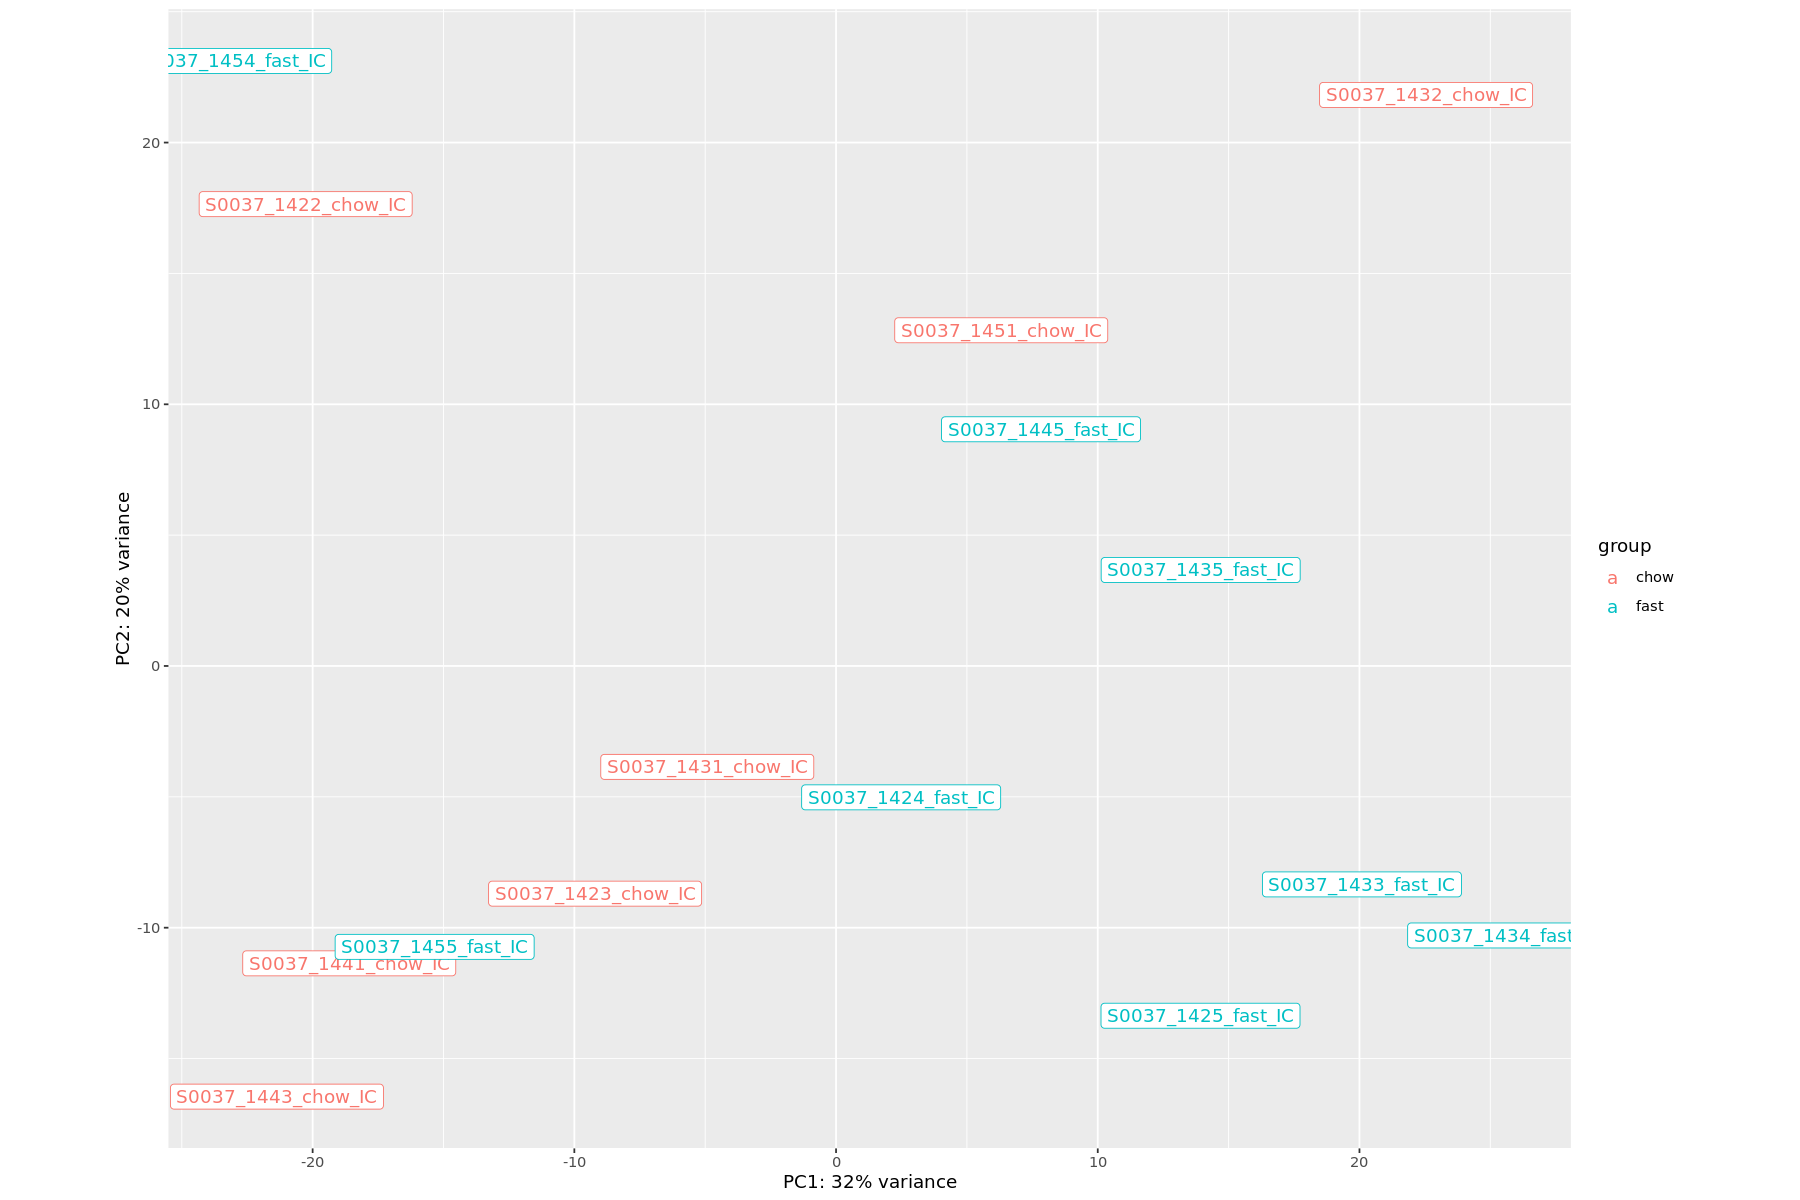

In [21]:
selected_run = '0037'
selected_region = 'IC'

keep_names = meta %>%
    filter(!is.na(filename)) %>%
    filter(!(name %in% outliers_list$names_failing_star_qc)) %>%
    filter(!(name %in% outliers_list$names_failing_all_region_pca_qc)) %>%
    filter(seq_run == selected_run) %>%
    filter(region == selected_region) %>%
    distinct(name) %>%
    pull(name)

preprocessed = do_preprocessing(counts, meta, keep_names) %>% do_pca %>% do_pca_detect_outliers(pcz_cutoff = 3)
preprocessed_list[[paste0(selected_run, '_', selected_region)]] = preprocessed
outliers_list[[paste0('names_failing_', selected_run, '_', selected_region, '_pca_qc')]] = preprocessed$meta_f %>% filter(PCA_zregion_outlier) %>% distinct(name) %>% pull(name)

options(repr.plot.width=15, repr.plot.height=10)
# plotPCA(preprocessed$vsd, intgroup=c("seq_run"), ntop=5000) + geom_label(aes(label = name))
plotPCA(preprocessed$vsd, intgroup=c("diet"), ntop=5000) + geom_label(aes(label = name))
# plotPCA(preprocessed$vsd, intgroup=c("region"), ntop=5000) + geom_label(aes(label = name))

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 247 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



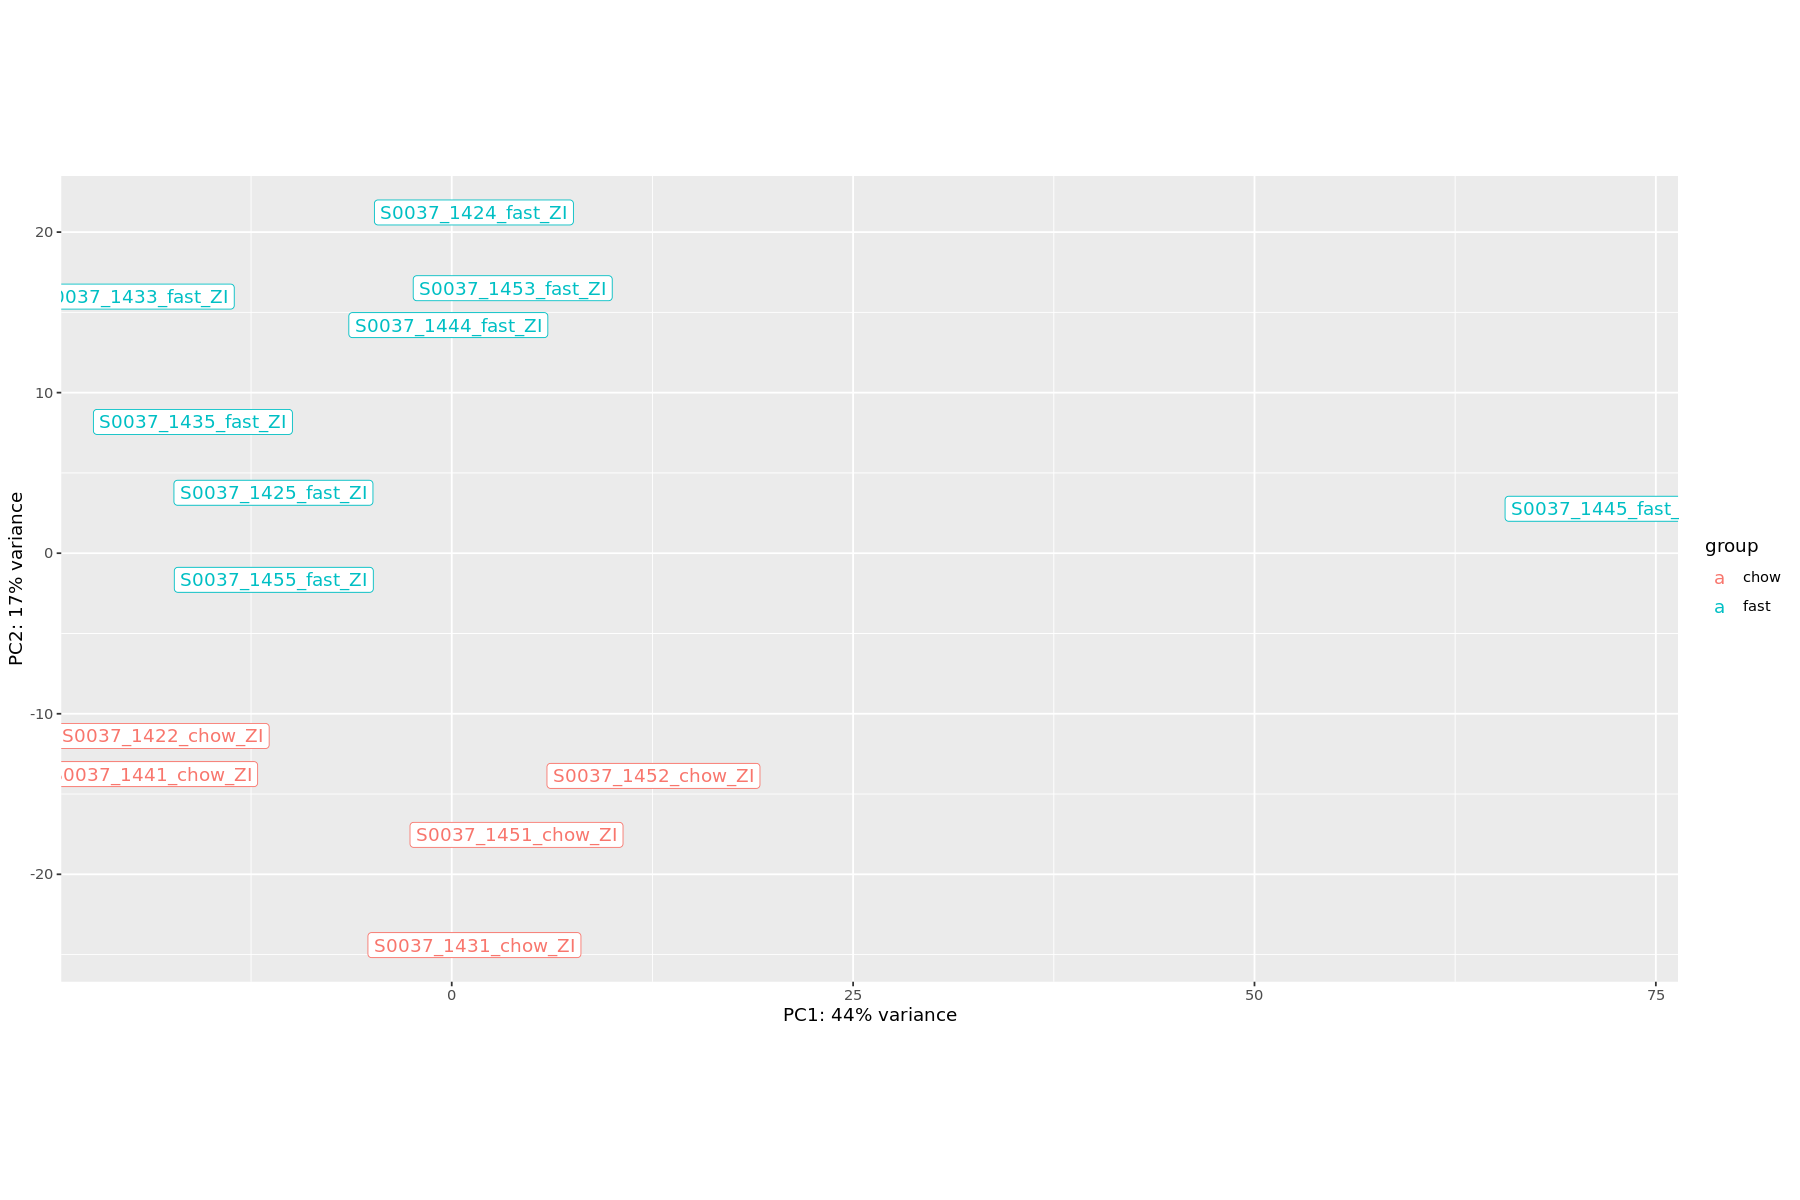

In [22]:
selected_run = '0037'
selected_region = 'ZI'

keep_names = meta %>%
    filter(!is.na(filename)) %>%
    filter(!(name %in% outliers_list$names_failing_star_qc)) %>%
    filter(!(name %in% outliers_list$names_failing_all_region_pca_qc)) %>%
    filter(seq_run == selected_run) %>%
    filter(region == selected_region) %>%
    distinct(name) %>%
    pull(name)

preprocessed = do_preprocessing(counts, meta, keep_names) %>% do_pca %>% do_pca_detect_outliers(pcz_cutoff = 3)
preprocessed_list[[paste0(selected_run, '_', selected_region)]] = preprocessed
outliers_list[[paste0('names_failing_', selected_run, '_', selected_region, '_pca_qc')]] = preprocessed$meta_f %>% filter(PCA_zregion_outlier) %>% distinct(name) %>% pull(name)

options(repr.plot.width=15, repr.plot.height=10)
# plotPCA(preprocessed$vsd, intgroup=c("seq_run"), ntop=5000) + geom_label(aes(label = name))
plotPCA(preprocessed$vsd, intgroup=c("diet"), ntop=5000) + geom_label(aes(label = name))
# plotPCA(preprocessed$vsd, intgroup=c("region"), ntop=5000) + geom_label(aes(label = name))

In [23]:
outliers_list %>% print

$names_failing_star_qc
 [1] "S0010_04_chow_HPF"   "S0010_12_fast_HY"    "S0010_11_fast_HPF"  
 [4] "S0010_10_fast_SC"    "S0037_1441_chow_HY"  "S0038_1422_chow_HY" 
 [7] "S0038_1451_chow_HY"  "S0038_1431_chow_HPF" "S0038_1441_chow_HPF"
[10] "S0038_1452_chow_HPF" "S0038_1422_chow_SC"  "S0038_1442_chow_IC" 
[13] "S0038_1452_chow_IC"  "S0038_1432_chow_ZI"  "S0038_1442_chow_ZI" 
[16] "S0038_1423_chow_ZI"  "S0038_1435_fast_HY"  "S0038_1445_fast_HY" 
[19] "S0038_1455_fast_HY"  "S0038_1424_fast_HPF" "S0038_1444_fast_HPF"
[22] "S0038_1424_fast_SC"  "S0038_1433_fast_SC"  "S0038_1434_fast_SC" 
[25] "S0038_1435_fast_SC"  "S0038_1444_fast_IC"  "S0038_1453_fast_IC" 
[28] "S0038_1434_fast_ZI"  "S0038_1454_fast_ZI" 

$names_failing_all_region_pca_qc
 [1] "S0010_06_chow_SC"    "S0010_01_chow_IC"    "S0010_05_chow_PFC"  
 [4] "S0010_12_fast_SC"    "S0010_09_fast_PFC"   "S0010_13_HFD_HY"    
 [7] "S0010_18_HFD_SC"     "S0010_16_HFD_IC"     "S0037_1451_chow_HPF"
[10] "S0037_1443_chow_ZI"  "S0037_1425_fas

In [24]:
outliers_tbl <- outliers_list %>% 
  enframe(name = "Name", value = "Sample") %>%
  unnest(Sample) %>%
  rename(name = Sample, failed = Name)

outliers_tbl

failed,name
<chr>,<chr>
names_failing_star_qc,S0010_04_chow_HPF
names_failing_star_qc,S0010_12_fast_HY
names_failing_star_qc,S0010_11_fast_HPF
names_failing_star_qc,S0010_10_fast_SC
names_failing_star_qc,S0037_1441_chow_HY
names_failing_star_qc,S0038_1422_chow_HY
names_failing_star_qc,S0038_1451_chow_HY
names_failing_star_qc,S0038_1431_chow_HPF
names_failing_star_qc,S0038_1441_chow_HPF


In [25]:
meta_qc = left_join(meta, outliers_tbl, by='name') %>%
    rename(qc = failed) %>%
    mutate(qc = replace_na(qc, 'ok')) %>%
    mutate(qc = case_when(qc == 'names_failing_star_qc' ~ 'fail STAR',
                          qc == 'names_failing_all_region_pca_qc' ~ 'fail PCA',
                          TRUE ~ 'ok')) %>%
    mutate(animal_id = animal_id %>% as.character)

sample_order <- meta_qc %>%
distinct(animal_id, seq_run, diet) %>%
arrange(seq_run, diet, animal_id) %>%
select(seq_run, diet, animal_id) %>%
distinct(animal_id) %>%
pull(animal_id) %>% as.character

meta_qc = meta_qc %>%
    mutate(animal_id = factor(animal_id, levels=sample_order))


meta_qc %>% filter(qc != 'ok')


filename,seq_run,seq_sample,rna_conc_qbit,box_id,animal_id,diet,diet_kcal,region,hemisphere,⋯,bw_change,bw_change_pct,bw_change_pct_ph,fw_i,fw_f,kcal_intake,power_intake,notes,name,qc
<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
4_Chow_Hip_right_S68,0010,S68,25.60,35,4,chow,3227,HPF,right,⋯,0.5,0.021276596,0.0013160781,743.5,735.3,13230.70,818.3938,NA,S0010_04_chow_HPF,fail STAR
6_Chow_SC_right_S31,0010,S31,65.60,36,6,chow,3227,SC,right,⋯,1.1,0.042471042,0.0026379529,713.6,706.4,11617.20,721.5652,NA,S0010_06_chow_SC,fail PCA
1_Chow_IC_left_S5,0010,S5,45.60,34,1,chow,3227,IC,left,⋯,1.2,0.051282051,0.0032051282,741.7,734.4,11778.55,736.1594,NA,S0010_01_chow_IC,fail PCA
5_Chow_PFC_right_S11,0010,S11,18.10,36,5,chow,3227,PFC,right,⋯,-0.3,-0.012145749,-0.0007591093,713.6,706.4,11617.20,726.0750,NA,S0010_05_chow_PFC,fail PCA
12_Fasting_Hyp_both_S23,0010,S23,95.40,39,12,fast,0,HY,both,⋯,-1.5,-0.064935065,-0.0040166020,0.0,0.0,0.00,0.0000,NA,S0010_12_fast_HY,fail STAR
11_Fasting_Hip_right_S35,0010,S35,12.90,39,11,fast,0,HPF,right,⋯,-2.0,-0.075187970,-0.0046992481,0.0,0.0,0.00,0.0000,NA,S0010_11_fast_HPF,fail STAR
10_Fasting_SC_right_S88,0010,S88,27.80,38,10,fast,0,SC,right,⋯,-0.5,-0.020325203,-0.0012572291,0.0,0.0,0.00,0.0000,NA,S0010_10_fast_SC,fail STAR
12_Fasting_SC_right_S12,0010,S12,5.80,39,12,fast,0,SC,right,⋯,-1.5,-0.064935065,-0.0040166020,0.0,0.0,0.00,0.0000,NA,S0010_12_fast_SC,fail PCA
9_Fasting_PFC_left_S79,0010,S79,11.90,38,9,fast,0,PFC,left,⋯,-0.6,-0.024896266,-0.0015560166,0.0,0.0,0.00,0.0000,NA,S0010_09_fast_PFC,fail PCA


In [26]:
preprocessed_list %>% qs::qsave('preprocessed_list.qs')
outliers_list %>% qs::qsave('outliers_list.qs')

In [27]:
# Convert the name column to a factor with the desired order
meta_animal = read_csv('../03_build_meta_and_counts/meta_animal.csv')

meta_animal$animal_id <- factor(meta_animal$animal_id, levels = sample_order)

meta_animal = meta_animal %>%
mutate(animal_id = as.character(animal_id)) %>%
rowwise %>%
mutate(animal_id = replace_na(animal_id, as.character(box_id))) %>%
ungroup


Rows: 38 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): diet, notes
dbl  (14): box_id, animal_id, diet_kcal, experiment_duration, bw_i_pre, bw_i...
dttm  (2): experiment_start, time_of_euthanasia

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [28]:
meta_qc = left_join(meta, outliers_tbl, by='name') %>%
    rename(qc = failed) %>%
    mutate(qc = replace_na(qc, 'ok')) %>%
    mutate(qc = case_when(qc == 'names_failing_star_qc' ~ 'fail STAR',
                          qc == 'names_failing_all_region_pca_qc' ~ 'fail PCA',
                          TRUE ~ 'ok'))

meta_qc %>% filter(qc != 'ok')
meta_qc %>% write_csv('meta_qc.csv')
meta_qc %>% qs::qsave('meta_qc.qs')

filename,seq_run,seq_sample,rna_conc_qbit,box_id,animal_id,diet,diet_kcal,region,hemisphere,⋯,bw_change,bw_change_pct,bw_change_pct_ph,fw_i,fw_f,kcal_intake,power_intake,notes,name,qc
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
4_Chow_Hip_right_S68,0010,S68,25.60,35,4,chow,3227,HPF,right,⋯,0.5,0.021276596,0.0013160781,743.5,735.3,13230.70,818.3938,NA,S0010_04_chow_HPF,fail STAR
6_Chow_SC_right_S31,0010,S31,65.60,36,6,chow,3227,SC,right,⋯,1.1,0.042471042,0.0026379529,713.6,706.4,11617.20,721.5652,NA,S0010_06_chow_SC,fail PCA
1_Chow_IC_left_S5,0010,S5,45.60,34,1,chow,3227,IC,left,⋯,1.2,0.051282051,0.0032051282,741.7,734.4,11778.55,736.1594,NA,S0010_01_chow_IC,fail PCA
5_Chow_PFC_right_S11,0010,S11,18.10,36,5,chow,3227,PFC,right,⋯,-0.3,-0.012145749,-0.0007591093,713.6,706.4,11617.20,726.0750,NA,S0010_05_chow_PFC,fail PCA
12_Fasting_Hyp_both_S23,0010,S23,95.40,39,12,fast,0,HY,both,⋯,-1.5,-0.064935065,-0.0040166020,0.0,0.0,0.00,0.0000,NA,S0010_12_fast_HY,fail STAR
11_Fasting_Hip_right_S35,0010,S35,12.90,39,11,fast,0,HPF,right,⋯,-2.0,-0.075187970,-0.0046992481,0.0,0.0,0.00,0.0000,NA,S0010_11_fast_HPF,fail STAR
10_Fasting_SC_right_S88,0010,S88,27.80,38,10,fast,0,SC,right,⋯,-0.5,-0.020325203,-0.0012572291,0.0,0.0,0.00,0.0000,NA,S0010_10_fast_SC,fail STAR
12_Fasting_SC_right_S12,0010,S12,5.80,39,12,fast,0,SC,right,⋯,-1.5,-0.064935065,-0.0040166020,0.0,0.0,0.00,0.0000,NA,S0010_12_fast_SC,fail PCA
9_Fasting_PFC_left_S79,0010,S79,11.90,38,9,fast,0,PFC,left,⋯,-0.6,-0.024896266,-0.0015560166,0.0,0.0,0.00,0.0000,NA,S0010_09_fast_PFC,fail PCA
